# Introduction

Logical operators in Pandas: `&`, `|`, `~`. If there are multiple expressions, each one is wrapped inside of parentheses `()` 


You can pipe different commands like this:

```py
df['Col1'].str.lower().str.contains('string')
```


The two main data structures in Pandas are **Series** and **DataFrames**

There are different ways of writing long piped queries:
```py
### ending your line with a reverse slash `\`
df.groupby("a") \
    .apply(...) \
    .sort_values(...)

df['col1'] = df['col1'] \
    .str.replace('\n', '<br>') \
    .str.replace('a', 'A')

df
### by enclosing the expression in parentheses
(
    df.groupby('a')
    .apply(...)
)
### or
(
    df
    .groupby('a')
    .apply(...)
)

df['col1'] = (
    df['col1']
    .str.replace('\n', '<br>')
    .str.replace('a', 'A')
)
```


# Data Formats

There are two formats in Pandas - Series and Dataframes. 


## Series

In [1]:
# Series
import pandas as pd

# Define one column of values
var1 = pd.Series([10, 50, 10, 30, 20])
var1.name = 'var1_series'
print(var1)
print('\n')

# Create column row-by-row using indeces
var2 = pd.Series({
	'Row1': 505, 
	'Row2': 510, 
	'Row3': 516
}, name = 'var2_series')
print(var2)
print('\n')

# or
var3 = pd.Series([505, 510, 516], index=['Row1', 'Row2', 'Row3'], name='var3_series')
print(var3)

df = pd.concat([var2, var3], axis=1)
df


0    10
1    50
2    10
3    30
4    20
Name: var1_series, dtype: int64


Row1    505
Row2    510
Row3    516
Name: var2_series, dtype: int64


Row1    505
Row2    510
Row3    516
Name: var3_series, dtype: int64


,var2_series,var3_series
Row1,505,505
Row2,510,510
Row3,516,516


In [2]:
import pandas as pd

sr = pd.Series(['a','b','c'])
print(sr)

### Get item's value at index 1
print('-'*40)
print( sr.get(1) )

### 
print('-'*40)
print( sr.where(sr == 'a') )

### 
print('-'*40)

print( sr[sr == 'b'] )
print( sr[sr == 'b'][1] )


0    a
1    b
2    c
dtype: object
----------------------------------------
b
----------------------------------------
0      a
1    NaN
2    NaN
dtype: object
----------------------------------------
1    b
dtype: object
b


In [3]:
import pandas as pd

var2 = pd.Series({
	'Row1': 505, 
	'Row2': 510, 
	'Row3': 516
})

### Iterate through
for i,j in enumerate(var2):
    if i == 1:
        print(i, var2.index[i])

1 Row2


In [4]:
# boolean array
var2 > 510
# Series masked with boolean array
var2[var2 > 510]

Row3    516
dtype: int64

## Dataframe

Row = Record = Observation

Column = Field = Feature = Attribute

In [5]:
# Dataframes 
# Dataframe column is a Series
import pandas as pd

# Convert series to dataframe

# method 1
name = pd.Series(['Evgenii', 'Caro', 'Cat'])
age = pd.Series([24, 27, 11])
df = pd.DataFrame({'name': name, 'age': age})
df

# method 2
df2 = name.to_frame().reset_index()
df2

,index,0
0,0,Evgenii
1,1,Caro
2,2,Cat


In [6]:
# DATAFRAMES

# Pandas format is similar to a dictionary of lists, more specifically, 
# a series data structure (2D data structure)

# Option 1
people = {
	'name': ['John', 'Steve', 'Stephen', 'Jane'], 
	'surname': ['Cramer', 'Buscemi', 'King', 'Foster'], 
	'age': [55, 43, 40, 25], 
}
people_df = pd.DataFrame(people)

# Option 2
people_df = pd.DataFrame({
	'on_var': ['John', 'Steve', 'Stephen', 'Jane'], 
	'surname': ['Cramer', 'Buscemi', 'King', 'Foster'], 
	'age': [55, 43, 40, 25], 
})

# Option 3
# Create a 5-column, 100-row pandas DataFrame
import numpy as np
npArray = np.random.random(size=(100, 5))
df = pd.DataFrame(npArray, columns=['one', 'two', 'three', 'four', 'five'])


In [7]:
# Create an empty dataframe
import pandas as pd
### Method 1
df = pd.DataFrame([], columns=['Column 1', 'Column 2', 'Column 3'])
### Method 2
df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Column 3'])
df

,Column 1,Column 2,Column 3


In [8]:
# Modify dataframe by a series

df1 = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    },
    index=['Evgenii', 'John', 'Asuka', 'Yagami'],
)

series1 = pd.Series(
	['Japanese', 'English'], 
	index=['Yagami', 'Evgenii']
)

df1['Languages'] = series1
df1


,Age,Height,Mark,Sport,Languages
Evgenii,24,186,A,Gym,English
John,25,186,C,Volleyball,NaN
Asuka,23,182,A,Baseball,NaN
Yagami,20,175,B,Cricket,Japanese


In [9]:
# Create a DF from a multidimensional NumPy array
import numpy as np
import pandas as pd

a = np.array( [['1',10],['2',20],['3',30]] )

df = pd.DataFrame({
	'Column1': a[:,0],
	'Column2': a[:,1]
})
df['Column2'] = df['Column2'].astype(int)
print(df.dtypes)
df

Column1    object
Column2     int32
dtype: object


,Column1,Column2
0,1,10
1,2,20
2,3,30


In [10]:
# Convert a dataframe into numpy array

df = pd.DataFrame({
	'Col1': [1, 2, 3, 4, 5], 
	'Col2': [10, 20, 30, 40, 50], 
	'Col3': [100, 200, 300, 400, 500]
})

# Convert one column
print( df['Col2'].to_numpy() )

# Convert all columns
print( df.to_numpy() )


[10 20 30 40 50]
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]
 [  5  50 500]]


In [11]:
# Create a DataFrame copy

import pandas as pd

df1 = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    },
    index=['Evgenii', 'John', 'Asuka', 'Yagami'],
)

df2 = df1.copy(deep=True)
df2.head()

,Age,Height,Mark,Sport
Evgenii,24,186,A,Gym
John,25,186,C,Volleyball
Asuka,23,182,A,Baseball
Yagami,20,175,B,Cricket


In [12]:
# another way to create a copy

df2 = df1.loc[:,:]
df2

,Age,Height,Mark,Sport
Evgenii,24,186,A,Gym
John,25,186,C,Volleyball
Asuka,23,182,A,Baseball
Yagami,20,175,B,Cricket


In [13]:
import pandas as pd

data = [['Pfizer', '10/10/21', 100],
        ['Pfizer', '10/11/21', None],
        ['Pfizer', '10/12/21', None],
        ['Pfizer', '10/13/21', 130],
        ['Pfizer', '10/14/21', None],
        ['Moderna', '10/10/21', 220],
        ['Moderna', '10/11/21', None],
        ['Moderna', '10/12/21', 280],
        ['Moderna', '10/13/21', None]]
df = pd.DataFrame(
    columns=['M', 'Date', 'Total'], 
    data=data
)

df

,M,Date,Total
0,Pfizer,10/10/21,100.0
1,Pfizer,10/11/21,NaN
2,Pfizer,10/12/21,NaN
3,Pfizer,10/13/21,130.0
4,Pfizer,10/14/21,NaN
5,Moderna,10/10/21,220.0
6,Moderna,10/11/21,NaN
7,Moderna,10/12/21,280.0
8,Moderna,10/13/21,NaN


In [14]:
import pandas as pd

df = pd.DataFrame({
	'Col1': [1, 2, 3, 4, 5], 
	'Col2': [10, 20, 30, 40, 50], 
	'Col3': [100, 200, 300, 400, 500]
})

df.to_dict('records')

[{'Col1': 1, 'Col2': 10, 'Col3': 100},
 {'Col1': 2, 'Col2': 20, 'Col3': 200},
 {'Col1': 3, 'Col2': 30, 'Col3': 300},
 {'Col1': 4, 'Col2': 40, 'Col3': 400},
 {'Col1': 5, 'Col2': 50, 'Col3': 500}]

In [15]:
import numpy as np
import pandas as pd

data = np.array([['a', 1], ['a', 2], ['a', 3], ['b', 4]])

df = pd.DataFrame({
    'type': data[:,0],
    'value': data[:,1]
})
df['value'] = df['value'].astype(int)
df


,type,value
0,a,1
1,a,2
2,a,3
3,b,4


# Import / export data

```py

# Batch process: read .json files from directory FolderWithJsonFiles, convert them to .tsv, save to current dir
import os; import pandas as pd

files = os.listdir('json')

if not os.path.exists('/tsv'):
	os.mkdir('tsv')
for i in files:
	print(i)
	df = pd.read_json(f'json/{i}')
	df = df[df[0] != '\n']
	name_noextension = i.split('.')[0]
	name_tsvextension = name_noextension + '.tsv'
	df.to_csv(f"tsv/{name_tsvextension}", sep='\t', index=False, header=False)
	print(f"Wrote tsv/{name_tsvextension}!")

```

## Reader

In [ ]:
# Read from web url
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

In [ ]:
# File reader
varname = pd.read_csv(
	'name.csv', 
	sep='\t', # or delimiter = '\t'; specify custom data delimiter
	header=None, # if file doesn't have a header / headers / column names
	na_values=['', '?', '-'], # defines values which are recognised as NA/NaN
	usecols=['Column1', 'Column2'], # only import the specified columns
	names=['Col1', 'Column2'], # pass names of columns
	dtype={'Col1': 'float'}, # parameter to force pandas to use certain dtype for a specified column
	parse_dates=[0], # parse_dates = True; parse_dates = ['Date']
	date_format='%d.%m.%Y',
	index_col=[0], # or index_col = 'Respondent' ; set one columns as an index column in dataframe
	decimal=',', 
	delim_whitespace=True, # as delimiters, whitespace of length 1 or more will be considered
	skiprows=2, # skip reading the first 2 rows from the file
	nrows=10, # number of a file's rows to read
	thousands=','
)

In [ ]:
df = pd.read_json('filename.json')

In [ ]:
df = pd.read_excel(
	'data.slxs',
	sheet_name = 'sheet1',
    dtype = {'column_name': str} # this is useful e.g. if you have a column with values like 0000, 0001, but you don't want it to be converted to 0, 1
)

## Writer

```py

df.to_csv(
	'filename.tsv', # can be .tsv, just specify parameter 'sep' 
	sep='\t',
	index=False, # don't output index column
	header=True # do you want to export header?
)
df.to_excel('filename.xlsx')
df.to_json('filename.json')
df.to_numpy()

```

In [16]:
import pandas as pd
# !pip install tabulate

df = pd.DataFrame({
    'variable 1': ['a', 'b', 'c', 'd'],
    'variable 2': [1, 2, 3, 4]
})

print( df.to_markdown() )


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [ ]:
len(['setosa', 'setosa', 'versicolor', 'versicolor', 'spinosa', 'spinosa', 'spinosa'])

7

In [ ]:
len(['Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
                    'Cras malesuada in dolor id imperdiet.'
                    'Suspendisse odio magna, ultricies at laoreet ac, accumsan cursus felis.',
                    'Nulla porttitor urna non cursus pulvinar. Aenean rhoncus nibh eget ante efficitur, ut bibendum felis viverra.',
                    'Sed ac lectus ex. Ut eu erat vehicula, viverra massa a, sagittis nibh.',
                    'Aenean fringilla lorem nec nisl cursus, vitae posuere ante facilisis. Curabitur elementum ex sed lectus vehicula dictum.',
                    'Nam nisi tellus, laoreet porta enim vitae, finibus interdum tellus. Cras non pulvinar sapien, non egestas ante. Fusce et iaculis arcu. Ut sit amet eros bibendum, pulvinar lectus vel, pharetra risus.'])

6

In [ ]:
dict1 = {
    'a': [1, 2, 3],
    'b': 'another',
    'c': 5
}
keys = ['b', 'c']
for i in keys:
    

[1, 2, 3]

### xlsxwriter

Conditional Formatting: https://xlsxwriter.readthedocs.io/working_with_conditional_formats.html

#### Ex1 (simple generic auto-fix)

This is the generic universal code that can be run with any csv to output it to a fixed excel.  

In [ ]:
import pandas as pd

def generic_excel_write(INPUT: str|pd.DataFrame, 
                        INPUT_DELIMITER: str = ',',
                        OUTPUT_RELATIVE_PATH: str = None):
    """
    # Parameters
    
    INPUT
        [str or pandas dataframe] input file that you want to process into excel. 
        If data type = str, then it's a local file that you have to read.
        If data type = pandas dataframe, then you passed in the pandas dataframe.
    
    INPUT_DELIMITER
        Delimiter that you want to use. Only applicable when you read a csv file as an input. 
    
    OUTPUT_RELATIVE_PATH
        Output name for your output file. 
    """
    # Read ifs
    if type(INPUT) == str:
        df = pd.read_csv(INPUT, 
                    sep=INPUT_DELIMITER
        )
        display(df)
    elif type(INPUT) == pd.core.frame.DataFrame:
        df = INPUT.copy(deep=True)
    else:
        raise TypeError('unknown input format')
    # making output file name ifs
    if not OUTPUT_RELATIVE_PATH:
        if type(INPUT) == str:
            output_relative_path = '.'.join( INPUT.split('.')[:-1] ) + '.xlsx'
        else:
            output_relative_path = 'output.xlsx'
    else:
        output_relative_path = OUTPUT_RELATIVE_PATH
    #
    writer = pd.ExcelWriter(output_relative_path, engine='xlsxwriter')
    workbook = writer.book
    # tab to scroll item ratio
    workbook.set_tab_ratio(30)
    # write to main sheet
    df.to_excel(writer, 
                sheet_name='Main',
                index=False)
    worksheet1 = writer.sheets['Main']
    # auto-adjust column width
    for i, col in enumerate(df):
        width = min(
            max(
                df[col].apply(lambda x: len(str(x))).max(),
                len(col)),
            80) + 5
        worksheet1.set_column(i, i, width, workbook.add_format({'text_wrap': True,
                                                                'valign': 'top'}))
    # put filter at the top of each column
    (max_row, max_col) = df.shape
    worksheet1.autofilter(0, 0, max_row, max_col-1)
    # format column headers
    columns = list(df.columns)
    for index, column_name in enumerate(columns):
        worksheet1.write(
            0, # row 0 
            index, # index of each column 
            column_name, # name of each column
            workbook.add_format({'bg_color': '#951F06',
                                 'valign': 'vcenter',
                                 'align': 'center',
                                 'bold': True,
                                 'font_color': '#FFFFFF'}))
    # Freeze the top row
    worksheet1.freeze_panes(1, 0)
    ##################################################
    ### Close the writer #############################
    ##################################################
    writer.close()
    return None


# ### DEFINE YOUR VARIABLES HERE
# INPUT_RELATIVE_PATH = 'datasets/CASP14_2020.csv'
# INPUT_RELATIVE_PATH = 'datasets/emails.csv'
# INPUT_DELIMITER = '\t'
# generic_excel_write(INPUT_RELATIVE_PATH, 
#                     INPUT_DELIMITER)

df_test = pd.DataFrame({
    'Name':['John Wayne', 'Nicolas Cage', 'Homer Simpson'],
    'age': [100, 30, 20]})

for i, j in (
    ('datasets/CASP14_2020.csv', '\t'),
    ('datasets/emails.csv', ','),
    ('datasets/players.csv', ','),
    ('datasets/survey_results_public_trimmed-2.csv', ','),
    (df_test, None)
):
    generic_excel_write(i, j)

generic_excel_write(df_test, None, 'datasets/df_test.xlsx')


,#,GR code,GR name,Domains Count,SUM Zscore (>-2.0),Rank SUM Zscore (>-2.0),AVG Zscore (>-2.0),Rank AVG Zscore (>-2.0),SUM Zscore (>0.0),Rank SUM Zscore (>0.0),AVG Zscore (>0.0),Rank AVG Zscore (>0.0)
0,1,427,AlphaFold2,102,280.5661,1,2.7506,1,280.5661,1,2.7506,1
1,2,473,BAKER,102,101.0821,2,0.9910,2,102.3821,2,1.0037,2
2,3,403,BAKER-experimental,102,98.2782,3,0.9635,3,100.7841,3,0.9881,3
3,4,480,FEIG-R2,102,76.9694,4,0.7546,4,80.7039,4,0.7912,4
4,5,129,Zhang,102,73.7731,5,0.7233,6,74.7589,5,0.7329,5
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,169,3D-JIGSAW-SwarmLoop,102,-158.0391,115,-1.5494,136,0.0000,140,0.0000,140
142,143,54,SFGroup,1,-203.5959,145,-1.5959,138,0.0000,140,0.0000,140
143,144,242,trioFold,50,-187.7601,135,-1.6752,142,0.0000,140,0.0000,140
144,145,107,FoldEM,71,-185.8083,134,-1.7438,144,0.0000,140,0.0000,140


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19995,I agree,I am a developer by profession,35-44 years old,"Employed, part-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,30-60 minutes a day,Microservices;Automated testing,Financial Services,Appropriate in length,Neither easy nor difficult,68240.0
19995,19996,I agree,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Books / Physical media;Friend or family member...,Books;Recorded coding sessions;How-to videos;V...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
19996,19997,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,86897.0
19997,19998,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;On the job training;Other online res...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length

#### Ex2 (planets)

In [ ]:
import pandas as pd

df = pd.read_csv('datasets/planets-info/planets_data.csv')
df['solar_constant * magnetic_field_strength'] = 0

print(df.columns)
df.head(3)

Index(['planetOrder', 'name', 'description', 'wikiLink', 'imgSrc', 'type',
       'diameter_km', 'mass_kg', 'distance_from_sun_km',
       'average_orbital_distance_AU', 'orbital_period_days',
       'rotation_period_hours', 'number_of_moons', 'ring_system',
       'global_magnetic_field', 'average_temperature_celsius',
       'surface_pressure_bars', 'atmospheric_composition', 'notable_features',
       'escape_velocity_km_s', 'axial_tilt_degrees', 'albedo', 'gravity_m_s2',
       'day_length_earth_days', 'density_g_cm3', 'surface_composition',
       'volume_km3', 'mean_orbital_speed_km_s', 'orbital_eccentricity',
       'synodic_period_days', 'orbital_inclination_degrees',
       'surface_area_km2', 'solar_constant_W_m2', 'magnetic_field_strength_uT',
       'solar_constant * magnetic_field_strength'],
      dtype='object')


,planetOrder,name,description,wikiLink,imgSrc,type,diameter_km,mass_kg,distance_from_sun_km,average_orbital_distance_AU,...,surface_composition,volume_km3,mean_orbital_speed_km_s,orbital_eccentricity,synodic_period_days,orbital_inclination_degrees,surface_area_km2,solar_constant_W_m2,magnetic_field_strength_uT,solar_constant * magnetic_field_strength
0,1,Mercury,Mercury is the smallest planet in the Solar Sy...,https://en.wikipedia.org/wiki/Mercury_(planet),{'img': 'https://upload.wikimedia.org/wikipedi...,Terrestrial,4879,3.300000e+23,57900000.0,0.39,...,"Silicate rock, iron core",6.083000e+10,47.36,0.2056,116.75,7.00,74800000.0,6.3,0.3,0
1,2,Venus,Venus is the second planet from the Sun and is...,https://en.wikipedia.org/wiki/Venus,{'img': 'https://upload.wikimedia.org/wikipedi...,Terrestrial,12104,4.870000e+24,108200000.0,0.72,...,"Rocky, volcanic surface",9.284300e+11,35.02,0.0068,583.92,3.39,460000000.0,2610.0,0.0,0
2,3,Earth,Earth is the third planet from the Sun and the...,https://en.wikipedia.org/wiki/Earth,{'img': 'https://upload.wikimedia.org/wikipedi...,Terrestrial,12742,5.970000e+24,149600000.0,1.00,...,"Silicate crust, liquid water",1.083210e+12,29.78,0.0167,365.25,0.00,510000000.0,1361.0,25.0,0


In [ ]:
import pandas as pd
import seaborn as sns
from xlsxwriter.utility import xl_rowcol_to_cell

writer = pd.ExcelWriter('datasets/planets-info/planets_data_proc.xlsx', engine='xlsxwriter')
workbook = writer.book

df.to_excel(writer, 
            sheet_name='main', 
            index=False)
worksheet = writer.sheets['main']
for i, col in enumerate(df):
    if col == 'description':
        worksheet.set_column(i, i, 5, workbook.add_format({'bold': True}))
    if col == 'wikiLink':
        for row_num, url in enumerate(df['wikiLink'], start=1):
            worksheet.write_url(row_num, i, url, workbook.add_format({'font_color': 'green'}))

writer.close()

In [ ]:
df['wikiLink'].iloc[0]

'https://en.wikipedia.org/wiki/Mercury_(planet)'

In [ ]:
import re

for i in [
    'this is not a string!',
    'https://en.wikipedia.org/wiki/Mercury_(planet)'
]:
    output = re.findall(r'^https?://\S+', i)
    print(output)
    print(len(output))

[]
0
['https://en.wikipedia.org/wiki/Mercury_(planet)']
1


In [ ]:
import pandas as pd
import seaborn as sns
from xlsxwriter.utility import xl_rowcol_to_cell

writer = pd.ExcelWriter('datasets/planets-info/planets_data_proc.xlsx', engine='xlsxwriter')
### Access the workbook and worksheet objects
workbook = writer.book
# workbook writing
workbook.set_tab_ratio(30)


empty_df = pd.DataFrame()
empty_df.to_excel(writer, sheet_name='intro')
worksheet0 = writer.sheets['intro']
worksheet0.merge_range('A1:AS1', '      Title here', workbook.add_format({'font_size': 20,
                                                                          'font_color': '#333333'}))

### Write each dataframe slice to a different sheet
df.to_excel(writer, 
            sheet_name='main', 
            index=False)

def apply_format_to_sheet(worksheet, 
                          name_sheet: str, 
                          df: pd.DataFrame, 
                          chosen_format: dict[str:dict]):
    for i, col in enumerate(df):
        width = min(
            max(
                df[col].apply(lambda x: len(str(x))).max(),
                len(col)),
            80) + 5
        if col not in chosen_format:
            worksheet.set_column(i, i, width)
        else:
            worksheet.set_column(i, i, width, workbook.add_format(chosen_format[col]))
    return None

chosen_format = {
    'planetOrder': {'align':'center',
                    'valign': 'vcenter'},
    'name': {'align':'center',
             'valign': 'vcenter',
            #  'bg_color': '#951F06',
             'bold': True,
            #  'font_color': '#FFFFFF',
            #  'border': 1,
            #  'border_color': '#D3D3D3'
             },
    'description': {'text_wrap':True, 'font_size':20},
    'wikiLink': {'align': 'right', 'bold': True, 'font_size':20},
    'width': {'align':'center', 'num_format':'#,##0.00'},
    'diameter_km': {'align':'right', 'num_format':'#,##0'},
    'distance_from_sun_km': {'align':'right', 'num_format':'#,##0'}
}
worksheet1 = writer.sheets['main']
worksheet1.set_zoom(90)
apply_format_to_sheet(worksheet1,
                      'main',
                      df,
                      chosen_format)
# set colour to row 3 (Earth)
# worksheet1.set_row(3, None, 
                #    workbook.add_format({
                    #    'bg_color': '#ADD8E6'
                    # 'bold': True
                    #    }))

# conditional formatting
# worksheet.conditional_format('G2:G1000', {'type':'2_color_scale'})
worksheet1.conditional_format('G2:G10000', {'type': 'data_bar',
                                            'bar_solid': True})
worksheet1.conditional_format('I2:I10000', {'type': '2_color_scale',
                                            'min_color': 'white',
                                            'max_color': '#A91B0D'})
worksheet1.conditional_format('M2:M10000', {'type': '2_color_scale',
                                            'min_color': 'white',
                                            'max_color': '#ff6c74'})
worksheet1.conditional_format('R2:R10000', {'type': 'text',
                                            'criteria': 'containing',
                                            'value': 'oxygen',
                                            'format': workbook.add_format({'bg_color': '#FFEB9C'})})

# Boolean columns
# N : ring_system
# O : global_magnetic_field
for column in ('N', 'O'):
    for val, colour in (
        ('TRUE', 'green'),
        ('FALSE', 'red')
    ):
        worksheet1.conditional_format(f'{column}2:{column}10000', {'type': 'text',
                                                    'criteria': 'containing',
                                                    'value': val,
                                                    'format': workbook.add_format({'font_color': colour,
                                                                                'bold': True})})

# N (ring_system), O (global_magnetic_field) are boolean

# P (average_temperature_celsius) is temperature
worksheet1.conditional_format('P2:P10000', {'type': 'data_bar',
                                            'bar_solid': True,
                                            'bar_border_color': 'black',
                                            'bar_negative_color_same': False,
                                            'bar_negative_border_color_same': True,
                                            'bar_color': 'red',
                                            'bar_negative_color': 'blue'})

# put filter at the top of each column
(max_row, max_col) = df.shape
worksheet1.autofilter(0, 0, max_row, max_col-1)

# format column headers
columns = list(df.columns)
for index, col in enumerate(columns):
    worksheet1.write(0, index, col, workbook.add_format({'bg_color': '#951F06',
                                                          'valign': 'vcenter',
                                                          'align': 'center',
                                                          'bold': True,
                                                          'font_color': '#FFFFFF'}))

# ADD COLUMN
# add formula
for i in range(2, 1000):
    worksheet1.write_formula(f'AI{i}', f'=SUM(AG{i}, AH{i})')

# embed image
# NOTE: available in excel 365 versions from 2023 onwards, for older versions a #value! error is displayed
# worksheet1.set_row(1, 60)
# worksheet1.embed_image('C11', 'newplot.png')

# Freeze the top row
worksheet1.freeze_panes(1, 0)

# insert a chart
empty_df = pd.DataFrame()
empty_df.to_excel(writer, sheet_name='plots')
worksheet2 = writer.sheets['plots']

chart1 = workbook.add_chart({'type': 'scatter'})
chart1.add_series({'name': 'chartName',
                  'categories': '=main!$T$2:$T$8',
                  'values': '=main!$W$2:$W$8'})
chart1.set_title({'name': 'Escape velocity and gravity'})
chart1.set_x_axis({'name': 'escape_velocity_km_s'})
chart1.set_y_axis({'name': 'gravity_m_s2'})
chart1.set_style(5)
worksheet2.insert_chart('B2', 
                        chart1)


### Save the file
writer.close()


In [ ]:
df.shape

(8, 34)

## Pre-loaded datasets

In [ ]:
"""
You can get lots of pre-loaded datasets
in the Pandas DataFrame format 
in Seaborn
"""
import seaborn as sns
print(sns.get_dataset_names())

### Load iris dataset
iris = sns.load_dataset('iris')
iris.head()


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# View / Filter

To prevent the ubiquitous `SettingWithCopyWarning: a value is trying to be set on a copy of a slice from a DataFrame` warning, you can copy the filtered dataframe:
```py
# instead of this
df2 = df.query('Duration > 100') # -> SettingWithCopyWarning
# Use this
df2 = df.query('Duration > 100').copy()
```

After some operations, such as filtering out rows, the continuity of index gets interrupted. In these situations, you might need to reset the index:
```py
df = df.reset_index()
```

---

```py
# Boolean array
mask = df['Colname'] > 100
df[mask]
```

```py
### View pandas dataframe in a beautiful format
display(df.head())
pd.set_option('display.max_columns', 2) # See a specified amount of columns
df.shape # Shows numbers of rows, columns. Attribute, so no parentheses
df.shape[0] # Number of rows
df.shape[1] # Number of columns
df.info() # Shows index, name, and datatype of each column, with count of nonnull values

# Show a summary of numerical variables
df.describe() 
df.describe().style.format('{:,.0f}')

df.dtypes # Show data types of variables
df['Col1'].unique() # Shows unique values in a column
df['Col1'].value_counts() # counts unique categories in a column

df['Col1'][0] # Access a specific value by column name and row index

###########################################################################################
#####   COLUMNS   #########################################################################
###########################################################################################
df.columns # List all columns
list(df.columns) # List all columns in datatype 'list'
# Creeate a list out of a single column
list(df['Col1']) 
df['column'].tolist()

# Get all values for one row for all columns
list( df.values[0] )

# Convert df to nested list, where each sublist consists of values for each row
df.values.tolist()

# Get str of one value in one column
###### only searches for one element. If there are multiple, throws an error
df['Col1'].item()

df['Col1'] # Access a column
df.Col1
df[['Col1', 'Col2']] # Access multiple columns
df['Col1'].apply(len) # Check length of each item in column
df['Col1'] = df['Col1'].apply(lambda x: x.lower())
df.apply(pd.Series.min) # Return the minimum values for each column
df.apply(lambda x: x.min())
# For a categorical variable, print unique categories in a column
df['Col1'].value_counts()

df[['Col1', 'Col2']] # Only take specified columns
df1 = df.drop(["Survived"], axis=1) # Filter out all columns except "Survived"
df.drop(['var1', 'var2'], axis=1)
df.loc[:, df.columns != 'column2'] # Take all columns except for 'column2'

df[df['Col1'].isin(['Name1'])] # Filter: Col1 = Name1
df[df['Col1'].str.contains('Name1', na=False)] # Filter: Column contains Name1
df[df['Col1'].str.contains('this|that')==False] # Filter rows which DO NOT contain str 'this' or 'that'
df[df['Col1'].str.startswith('D')]
df[df['Col1'] > 100] # Filter by 1 condition
df[ (df['Col1'] > 100) & (df['Col2'] != 5) ] # Filter by two IF conditions
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10 # In column 'Age', if value is greater than 100, divide it by 10:
df[df['Col1'].between(left=4, right=5)] # Filter column btw two values
# apply the same filter condition on multiple columns
df[(df[cols] % 2 == 0).any(axis=1)] # cols = list of columns, e.g. df.columns

###########################################################################################
#####   ROWS   ############################################################################
###########################################################################################
df.head(10) # See the first 10 rows
# or
df[0:10]
df[['Col1', 'Col2']].head(5) # Show the first 5 rows of the specified columns
df.tail(10) # See the last 10 rows


df['body_mass_g'].value_counts() # count occurrence of each unique value in the column
df['body_mass_g'].value_counts(normalize=True) # percentage
df['body_mass_g'].value_counts()[6300] # count only this value

df['body_mass_g'].nlargest(5) # print weights of 5 largest entries 
df.nlargest(5, 'body_mass_g') # print rows of 5 largest entries

(df['bill_depth_mm'] < df['bill_length_mm']).sum() # Count how many times the condition is met btw two columns

# Iterate over all rows
for index, row in df.iterrows():
	print(index, row['Colname'])
	if row['Name'] == 'Jane':
		df['Name'].iloc[index] = 'Found Jane!'

# Access all rows containing 'Keyword' in a column:
for iter, i in enumerate(df['Col1']):
	if 'Keyword' in i:
		print( df.loc[iter] )



```

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})
# df['b'] = (
#     df['a'] <=5
# )
df['b'] = df['a'] <= 5
df

,a,b
0,1,True
1,2,True
2,3,True
3,4,True
4,5,True
5,6,False
6,7,False
7,8,False
8,9,False
9,10,False


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'number': [1.9, 2.0, 3.1, 'aa', 5.2]
})

for index, row in df.iterrows():
    try:
        # row['number'] = int(row['number'])
        # row['number'] = 'asdf'
        # number = int(row['number'])
        number = row['number'] * 100
        df['number'].iloc[index] = number
    except Exception as e:
        print(e)
        pass

df.head()


,number
0,190.0
1,200.0
2,310.0
3,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4,520.0


In [ ]:
## Slice pandas dataframe based on a list of indices
import pandas as pd

df = pd.DataFrame({
	'feature1': [i for i in range(100)],
	'feature2': [i for i in range(500, 600)],
	'label': ['0' for i in range(50)] + ['1' for i in range(50)]
})

df.iloc[[0,1,2,50,51,60]]

,feature1,feature2,label
0,0,500,0
1,1,501,0
2,2,502,0
50,50,550,1
51,51,551,1
60,60,560,1


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'feature1': [i for i in range(500,600)],
	'feature2': [i for i in range(500, 600)],
	'label': ['0' for i in range(50)] + ['1' for i in range(50)]
})
df.iloc[:, 0:2]


,feature1,feature2
0,500,500
1,501,501
2,502,502
3,503,503
4,504,504
...,...,...
95,595,595
96,596,596
97,597,597
98,598,598


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'feature1': [i for i in range(100)],
	'feature2': [i for i in range(500, 600)],
	'label': ['0' for i in range(50)] + ['1' for i in range(50)]
})

df[df['feature1'] in [0,1]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': [i for i in range(10)],
    'column2': ['a' for i in range(10)]
})

### Print column without header
df['column1'].to_string(index=False)
### Print column with header
# df[['column1']].to_string(index=False)


'0\n1\n2\n3\n4\n5\n6\n7\n8\n9'

In [ ]:
"""
Get all non-null values
"""
import pandas as pd

df = pd.DataFrame({
    'column1': [1, 2, None, 3]
})

### Method 1
df[df['column1'].notnull()]
### Method 2
df[~df['column1'].isnull()]

,column1
0,1.0
1,2.0
3,3.0


In [ ]:
"""
Show duplicated values
"""
import pandas as pd
df = pd.DataFrame({
    'column1': ['abcd', 'aa', 'ab', 'abcd', 'aa', 'ac'],
    'column2': [1, 2, 3, 4, 5, 1]
})

df[df['column1'].duplicated()]


,column1,column2
3,abcd,4
4,aa,5


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'column_str': ['abcd', 'aa', 'ab', 'abcd'],
    'column_int': [1, 2, 3, 4],
    'column_bool': [True, False, True, True]
})

display( df._get_numeric_data().columns.tolist() )

display( df.select_dtypes(include=np.number).columns.tolist() )

df.select_dtypes(exclude=['number', 'bool_']).columns.tolist()


['column_int', 'column_bool']

['column_int']

['column_str']

In [ ]:
df.values[:, :-1]  ### get all the columns except the last one
df.values[:, -1] ### get the last column

array([1, 2, 3, 4, 5, 1], dtype=object)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'column1': ['abcd', 'aa', 'ab', 'abcd', 'aa', 'ac'],
    'column2': [1, 2, 3, 4, 5, 1]
})
df.values

array([['abcd', 1],
       ['aa', 2],
       ['ab', 3],
       ['abcd', 4],
       ['aa', 5],
       ['ac', 1]], dtype=object)

## Loc & iloc

```py
df.iloc[startrow:endrow, startcolumn:endcolumn]
```

`Loc`: Data selection based on column labels and/or row indices (based on index number)

`iloc`: data selection based on integer positions (so like in python, 0 means the first row / item)



In [1]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['John', 'Alice', 'Bob', 'Emily', 'Jack'],
    'Age': [25, 30, 35, 28, 32],
    'City': ['New York', 'London', 'Paris', 'Sydney', 'Tokyo'],
    'Salary': [50000, 60000, 70000, 55000, 80000]
})
df = df.set_index(pd.Series([i for i in range(2, 7)]))
df

,Name,Age,City,Salary
2,John,25,New York,50000
3,Alice,30,London,60000
4,Bob,35,Paris,70000
5,Emily,28,Sydney,55000
6,Jack,32,Tokyo,80000


Select the first row with `loc` vs `iloc`:

In [33]:
# Select the first row
df.loc[2]

Name          John
Age             25
City      New York
Salary       50000
Name: 2, dtype: object

In [36]:
df.loc[2]['City']

'New York'

In [38]:
df.iloc[0]

Name          John
Age             25
City      New York
Salary       50000
Name: 2, dtype: object

In [39]:
df.iloc[0]['City']

'New York'

Slicing

In [43]:
df.loc[[4, 6], :]

,Name,Age,City,Salary
4,Bob,35,Paris,70000
6,Jack,32,Tokyo,80000


In [44]:
df.loc[4:6, :]

,Name,Age,City,Salary
4,Bob,35,Paris,70000
5,Emily,28,Sydney,55000
6,Jack,32,Tokyo,80000


In [45]:
df.loc[[4, 6]]

,Name,Age,City,Salary
4,Bob,35,Paris,70000
6,Jack,32,Tokyo,80000


In [52]:
df.loc[[4, 6], ['Name']]

,Name
4,Bob
6,Jack


In [46]:
df.iloc[0:3, :]

,Name,Age,City,Salary
2,John,25,New York,50000
3,Alice,30,London,60000
4,Bob,35,Paris,70000


In [48]:
df.iloc[[0, 2]]

,Name,Age,City,Salary
2,John,25,New York,50000
4,Bob,35,Paris,70000


In [49]:
df.iloc[1:3]

,Name,Age,City,Salary
3,Alice,30,London,60000
4,Bob,35,Paris,70000


In [53]:
df.iloc[[0, 1], [0]]

,Name
2,John
3,Alice


In [ ]:
# Null handling
import pandas as pd

dFF = pd.DataFrame({
    'cat': [1, 2, 3, 4, 5],
    'Value': [None, 'a', 'b', None, '_']
})
dFF.loc[dFF['Value'].isna(), 'Value'] = 0
dFF


,cat,Value
0,1,0
1,2,a
2,3,b
3,4,0
4,5,_


In [ ]:
### All rows in the selected columns
### loc
df.loc[:, ['Name', 'Age']]
df[['Name', 'Age']].loc[:]
### iloc
df.iloc[:, [0, 1]]
df.iloc[:, 0:2]

,Name,Age
0,John,25
1,Alice,30
2,Bob,35
3,Emily,28
4,Jack,32


In [ ]:
### Select the first 3 rows of the last 2 columns
df.iloc[:3, -2:]

,City,Salary
0,New York,50000
1,London,60000
2,Paris,70000


In [3]:
# All values in the first column
df.iloc[:, 0]

2     John
3    Alice
4      Bob
5    Emily
6     Jack
Name: Name, dtype: object

In [ ]:
df.loc[df['Age'] < 40, ['Name', 'Country']]
df.iloc[df['Age'] < 40, [0, 3]]

In [19]:
"""
Set first row as column headers.
"""
import pandas as pd

df = pd.DataFrame({
    '1': ['Name', 'John', 'Martha'],
    '2': ['Age', 20, 15]
})
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df

,Name,Age
0,John,20
1,Martha,15


## Query

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# You can filter this column using .loc and filter statements - traditional filter statements
df[ (df['sepal_length'] > 5) & (df['sepal_width'] > 3.5) ]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
21,5.1,3.7,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [ ]:
"""
Alternatively, you can string many filter statements using the "query" method instead. 

Features:
- Different filter statements can be stringed together with either `&` or `and` operators
- You can use f-strings to insert values of variables: `@sep_wid_min`
"""
# Alternatively, you can string many filter statements using the "query" method instead
sep_wid_min = 3.5
pet_len_vals = [6.1, 6.7]
df.query("""sepal_length > 5 & sepal_width > @sep_wid_min & species.str.startswith("v").values & species == "virginica" & petal_length in @pet_len_vals""")

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica


In [ ]:
### If you are searching for one item, ...
queryText = 'petal_length == 5.0 & sepal_length == 6.0'
# queryText = 'species == "versicolor"'

print("> Method 1")
try:
    output = df.query(queryText)['sepal_length'].item()
    print(output)
except:
    print('Multiple values found!')


> Method 1
6.0


You can also use multi-line expressions:

```py
df_1.query("""country == "Japan" \
           & city == 'Tokyo' \
           & class == "fifth"
           """)
```

## Column functions

In [ ]:
df = pd.DataFrame({
	'feature1': [i for i in range(100)]
})

df

,feature1
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [ ]:
df['feature1-present?'] = df['feature1'].isin([1,2,3]).replace({False:0, True:1})
df

,feature1,feature1-present?
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
95,95,0
96,96,0
97,97,0
98,98,0


## Aggregate functions

`transform()` makes the groupby object apply the same logic within each group for each item. 

```py
# Print statistics per group
df.groupby('species')['body_mass_g'].mean() # Mean body mass in each species group
```

### Various

In [ ]:
"""
unique
"""
import pandas as pd

df = pd.DataFrame({
    'column1': ['cat', 'dog', 'cat', 'pet']
})

print( df['column1'].unique() )

['cat' 'dog' 'pet']


In [ ]:
"""
count unique categories
""";

import pandas as pd

df = pd.DataFrame({
    'column1': ['a','a','b','c',None,None,None]
})
### Method 1
a = (
    df['column1']
    .value_counts(dropna = False)
    .reset_index(name = 'count')
)
display(a)

### Method 2
b = (
    df
    .groupby('column1')
    ['column1'].count()
    .sort_values(ascending = False)
    .reset_index(name = 'count')
)
display(b)


,column1,count
0,None,3
1,a,2
2,b,1
3,c,1


,column1,count
0,a,2
1,b,1
2,c,1


In [ ]:
import pandas as pd
import numpy as np

array = np.array([
    ['A', 'A1', 10, 100],
    ['A', 'A2', 12, 300],
    ['A', 'A2', 3, 200],
    ['B', 'B1', 5, 400],
    ['B', 'B1', 0, 50]
])
df = pd.DataFrame({
    'group': array[:,0],
    'subgroup': array[:,1],
    'count': array[:,2],
    'count_historic': array[:,3]
})
df['count'] = df['count'].astype(int)
df['count_historic'] = df['count_historic'].astype(int)
display(df.dtypes, df)
df_grouped = df.groupby(
    ['group', 'subgroup']
)[[
    'count', 
    'count_historic'
]].sum().reset_index()
df_grouped

group             object
subgroup          object
count              int64
count_historic     int64
dtype: object

,group,subgroup,count,count_historic
0,A,A1,10,100
1,A,A2,12,300
2,A,A2,3,200
3,B,B1,5,400
4,B,B1,0,50


,group,subgroup,count,count_historic
0,A,A1,10,100
1,A,A2,15,500
2,B,B1,5,450


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'Member': ['M1', 'M2', 'M3', 'M1', 'M1', 'M2'],
	'label':  [1,1,0,1,0,1],
	'irrelevant': [0,0,0,0,0,0]
})

df2 = df.groupby(['Member']).sum(['label']).reset_index()[['Member', 'label']]
df2

,Member,label
0,M1,2
1,M2,2
2,M3,0


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'Type': ['A' for i in range(9)] + ['B' for i in range(9)],
	'Length': [100,110,105,102,107,1,2,500,700,   500,501,502,503,505,510,100,5,850]
})

# OR condition
df[df.groupby('Type')['Length'].apply( lambda x: (x == 100)|(x == 500) )]

df[df.groupby('Type')['Length'].apply( lambda x: x.between(100,200) )]

,Type,Length
0,A,100
1,A,110
2,A,105
3,A,102
4,A,107
15,B,100


### Transform vs apply

`apply` is like SQL's aggregate functions, while `transform` is like a window function.
- `apply` returns object of any shapre (e.g. dataframe or series, or in general changing number of rows)
- `transform` applies the same function to every cell, returning an object of identical shape to the input object

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Calculate sum by column
df.apply(sum).to_frame()

,0
A,6
B,60


In [ ]:
# Normalize every value in the column
df.transform(lambda x: (x - x.mean()) / x.std())

,A,B
0,-1.0,-1.0
1,0.0,0.0
2,1.0,1.0


### Case study

In [ ]:
import pandas as pd

df = pd.read_csv('datasets/pandas-groupby.csv')
df


,Age,Sex,Smoker,Salary
0,10,male,yes,100
1,11,male,yes,105
2,12,male,yes,110
3,15,male,no,111
4,16,male,no,120
5,30,female,no,50
6,31,female,no,51


In [ ]:
### Count categories in each group
(
    df
    .groupby(['Sex'])
    .size()
    .reset_index(name = 'Count')
)

,Sex,Count
0,female,2
1,male,5


In [ ]:
# Average salary per sex and smoker status
(
    df
    .groupby(['Sex', 'Smoker'])
    ['Salary']
    .mean()
    .reset_index()
)

,Sex,Smoker,Salary
0,female,no,50.5
1,male,no,115.5
2,male,yes,105.0


In [ ]:
# Multiple statistics
a = (
    df
    .groupby(['Sex', 'Smoker'])
    [['Age', 'Salary']]
    .agg(['sum', 'mean'])
)
display(a)
# or
b = (
    df
    .groupby(['Sex', 'Smoker'])
    .agg({'Age':'sum', 
          'Salary':'mean'
          })
)
display(b)

Age       Salary       
              sum  mean    sum   mean
Sex    Smoker                        
female no      61  30.5    101   50.5
male   no      31  15.5    231  115.5
       yes     33  11.0    315  105.0

Age  Salary
Sex    Smoker             
female no       61    50.5
male   no       31   115.5
       yes      33   105.0

In [ ]:
### Groupby into a df object
### Option 1
df.groupby(['Sex'])['Smoker'].value_counts().to_frame(name='Count').reset_index()
### Option 2
df.groupby(['Sex', 'Smoker'])['Smoker'].count().to_frame(name='Count').reset_index()
### Option 3
df.groupby(['Sex'])['Smoker'].value_counts().reset_index(name='Count')

,Sex,Smoker,Count
0,female,no,2
1,male,yes,3
2,male,no,2


In [ ]:
"""
Percentage for each item within each group
"""

import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Group':["group1","group2","group1","group3","group2"],
    'Sale-amount' :[11000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days', None,np.nan]
}).sort_values(
    by = ['Group', 'Sale-amount'], 
    ascending = [True, False]
)
display(df)

df['% of total sale amount within each group'] = \
    100 * df['Sale-amount'] \
    / df.groupby('Group')['Sale-amount'].transform('sum')
display(df)

,Group,Sale-amount,Duration
2,group1,23000,30days
0,group1,11000,30days
4,group2,26000,NaN
1,group2,25000,50days
3,group3,24000,None


,Group,Sale-amount,Duration,% of total sale amount within each group
2,group1,23000,30days,67.647059
0,group1,11000,30days,32.352941
4,group2,26000,NaN,50.980392
1,group2,25000,50days,49.019608
3,group3,24000,None,100.000000


In [ ]:
"""
SQL's window functions
"""
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Group':["group1","group2","group1","group3","group2"],
    'Sale-amount' :[11000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days', None,np.nan]
}).sort_values(
    by = ['Group', 'Sale-amount'], 
    ascending = [True, False]
)

df['max-sale-per-group'] = df.groupby('Group') \
    ['Sale-amount'].transform('max')
df


,Group,Sale-amount,Duration,max-sale-per-group
2,group1,23000,30days,23000
0,group1,11000,30days,23000
4,group2,26000,NaN,26000
1,group2,25000,50days,26000
3,group3,24000,None,24000


In [ ]:
"""
nlargest
"""
import pandas as pd

df = pd.DataFrame({
    'Type': ['a', 'a', 'a', 'b', 'b', 'b'],
	'Type': ['A' for i in range(9)] + ['B' for i in range(9)],
	'Length': [100,110,105,102,107,1,2,500,700,   500,501,502,503,505,510,100,5,850]
})
df.nlargest(10, 'Length')
df.nsmallest(2, 'Length')

,Type,Length
5,A,1
6,A,2


In [ ]:
"""
Get N highest values for each group in a groupby dataframe object
"""

import pandas as pd

# Create a sample dataframe
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Value': [10, 20, 15, 5, 25, 30, 12]
}
df = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Value': [10, 20, 15, 5, 25, 30, 12]
})

N = 3

### Answer 1
def get_n_highest(group):
    return group.nlargest(N, 'Value')
result = df.groupby('Group').apply(get_n_highest).reset_index(drop=True)

### Answer 2
result = df.groupby('Group').apply( lambda x: x.nlargest(N, 'Value') ).reset_index(drop=True)
result


,Group,Value
0,A,20
1,A,15
2,A,10
3,B,30
4,B,25
5,B,12


In [ ]:
"""
Calculate the total order amount for each customer
"""
import pandas as pd
data = {
    'OrderID': [1, 2, 3, 4, 5],
    'CustomerID': [101, 101, 103, 104, 105],
    'OrderDate': ['2022-01-01', '2022-02-15', '2022-03-10', '2022-04-20', '2022-05-05'],
    'OrderTotal': [100, 150, 200, 75, 120]
}
df = pd.DataFrame(data)
df

### Answer 1
df.groupby(['CustomerID'])['OrderTotal'].sum().reset_index()
### Answer 2
df.groupby('CustomerID')['OrderTotal'].agg(total_order_amount=('sum')).reset_index()

,CustomerID,total_order_amount
0,101,250
1,103,200
2,104,75
3,105,120


In [ ]:
import pandas as pd

df_test = pd.DataFrame({
    'a': ['a', 'b', 'c', 'a', 'b', 'c'],
    'b': [1, 2, 3, 1, 2, 3]
})
# Answer 1
df_test_1 = (
    df_test
    .groupby('a')
    .apply(
        lambda x: pd.Series({
            "Avg per groups in 'a'": x['b'].mean()
        })
    )
    .reset_index()
)
display(df_test_1)

# Answer 2
df_test_2 = (
    df_test
    .groupby('a')['b'].median()
    .reset_index()
)
display(df_test_2)


,a,Avg per groups in 'a'
0,a,1.0
1,b,2.0
2,c,3.0


,a,b
0,a,1.0
1,b,2.0
2,c,3.0


In [ ]:
import pandas as pd
import numpy as np

data = np.array([
    ['male', 1],
    ['male', 0],
    ['female', 1],
    ['male', 1],
    ['na', 0],
    ['female', 1],
    ['male', 0]
])
df = pd.DataFrame({
    'sex': data[:,0],
    'defuncion': data[:,1]
})

df['count'] = df.groupby('sex')['sex'].transform('count')
df

,sex,defuncion,count
0,male,1,4
1,male,0,4
2,female,1,2
3,male,1,4
4,na,0,1
5,female,1,2
6,male,0,4


In [ ]:
import pandas as pd
import numpy as np

data = np.array([
    ['male', 1],
    ['male', 1],
    ['male', 0],
    ['female', 0]
])
df = pd.DataFrame({
    'sex': data[:,0],
    'defuncion': data[:,1]
})
df['defuncion'] = df['defuncion'].astype(int)
display(df)

df2 = df.groupby('sex')['defuncion'].agg(['sum', 'count']).reset_index()
df2['%_defuncion'] = round( df2['sum'] / df2['count'] * 100, 1 )
df2


,sex,defuncion
0,male,1
1,male,1
2,male,0
3,female,0


,sex,sum,count,%_defuncion
0,female,0,1,0.0
1,male,2,3,66.7


In [ ]:
"""
Count null values per groups in Pandas DataFrame
"""
import pandas as pd

df = pd.DataFrame({
    'Store':   ['S1', 'S1', 'S1',    'S1',    'S2',    'S2', 'S2',     'S3', 'S3'],
    'Product': ['p1', 'p1', 'p1',    'p2',    'p1',    'p2', 'p2',     'p1', 'p1'],
    'Sales':   [10,   None,  None,     20,     10,     None , 1, 1,     2   ]
})

df['Sales'].isnull().groupby([df['Store'], df['Product']]).sum().astype(int).reset_index(name = 'null_count')

,Store,Product,null_count
0,S1,p1,2
1,S1,p2,0
2,S2,p1,0
3,S2,p2,1
4,S3,p1,0


## Window functions

### diff

In [22]:
"""
diff()
Gives you the difference between the current value and the previous-row value of a specified column.
For the first value gives you null
"""

import pandas as pd
df = pd.DataFrame({
    'a': [i*i for i in range(1, 10)]
})
df['b'] = df['a'].diff()
df['b'] = pd.to_numeric(df['b']).astype('Int64')
df

,a,b
0,1,<NA>
1,4,3
2,9,5
3,16,7
4,25,9
5,36,11
6,49,13
7,64,15
8,81,17


In [24]:
df['b'] = df['a'].diff(periods=3)
df

,a,b
0,1,NaN
1,4,NaN
2,9,NaN
3,16,15.0
4,25,21.0
5,36,27.0
6,49,33.0
7,64,39.0
8,81,45.0


### shift

In [3]:
import pandas as pd

df = pd.DataFrame({
    'a': [1, 2, 3, 4, 5]
})

df['product_with_previous'] = df['a'] * df['a'].shift(1)
df

,a,product_with_previous
0,1,NaN
1,2,2.0
2,3,6.0
3,4,12.0
4,5,20.0


In [15]:
"""
In a column, multiply the first value by 100, and subsequent values by the previous ones.
"""
import pandas as pd

df = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'C', 'C', 'C'],
    'Value': [2, 3, 4, 5, 6, 1, 2, 3]
})

def transform_group(group):
    result = []
    result.append(group.iloc[0] * 100)
    for val in group.iloc[1:]:
        result.append(result[-1] * val)
    return result

df['Transformed'] = df.groupby('Group')['Value'].transform(
    lambda x: transform_group(x.reset_index(drop=True))
)
df

,Group,Value,Transformed
0,A,2,200
1,A,3,600
2,A,4,2400
3,B,5,500
4,B,6,3000
5,C,1,100
6,C,2,200
7,C,3,600


## Sample

```py
df.sample(
    n=3, # number of items to randomly sample; can instead use `frac=0.5` to choose a fraction
    replace=False, # allow bootstrapping (sampling with replacement); default False
    random_state=42 # for reproducibility
)

# Sample from a dataframe column
df['body_mass_g'].sample(5).mean()
```

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'var1': np.linspace(0,100,10),
    'var2': ['a' for i in range(10)]
})

df.sample(n=5)

,var1,var2
4,44.444444,a
8,88.888889,a
9,100.000000,a
2,22.222222,a
1,11.111111,a


## Unique categories

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': ['a', 'a', 'b', 'c', 'b'],
    'column2': ['d', 'a', 'c', 'd', 'a']
})

len(set(list(df[df.columns].values.reshape(-1))))

4

## REGEX for column names


In [ ]:
import pandas as pd

df = pd.DataFrame({
    '241011_aushera_new-year': [1, 2, 3],
    '241013_kolf_christmas': [4, 5, 6],
    '220110_aushera_birthday': [7, 8, 9],
    '221213_loft_birthday': [10, 11, 12]
})
df.filter(regex="[0-9]{6}_aushera_[a-zA-Z0-9]{1,20}")

,241011_aushera_new-year,220110_aushera_birthday
0,1,7
1,2,8
2,3,9


# Data proc

```py

# COLUMNS EDIT
import pandas as pd
df = pd.DataFrame({'col1': [1, 2], 'col2': [10, 20], 'col3': ['1', '2'], 'col4': ['10', '20']})
df['newCol'] = df['col3'] + ' ' + df['col4'] # Add a new column
df['col1'] = df['col1'] + 1000000000 # Add a number to each value in a column
# Rearrange column order - put last column as first
colNames = list(df.columns.values)
df = df[colNames[-1:] + colNames[:-1]]

# Split one column into multiple based on a delimiter
## No assignment of new column names
df = df['col1'].str.split(';', expand=True)
## Assign new names to columns
df[['col3-1', 'col3-2']] = df['col3'].str.split(';', expand=True)

# Extract numbers from a DataFrame column
df['column'].str.extract(r'([0-9]+)')

df.rename(
	columns={'Name1':'Column1', 'Name2':'Column2'}, # Change names of the specified columns
	index = {'United States': 'USA', 'United Kingdom':'UK'}, # Rename indices if they are set to custom values
	inplace=True
) 
df.columns = ['Item name', 'col1', 'Amount', 'Longevity years'] # Change names of all columns in a df
df.columns = [x.upper() for x in df.columns] # Make all column titles upper case
df['ITEM_NAME'] = df['ITEM_NAME'].str.lower() # Change all items in a column

# Remove columns
df.drop(['A'], axis=1)
df.drop(columns=['col1', 'col2'], inplace=True)
df['colname'].str.split(' ', expand=True) # Str split one column into multiple columns

# ROWS EDIT
df = df.append({'a': 4, 'b': 400}, ignore_index=True) # Append a new row in an existing dataframe
df.loc[2, 'col1'] = 700 # Change one specific item in a specific column
df.at[2, 'col1'] = 700 # practically the same as loc
df.loc[2, ['col1', 'AMOUNT']] = [650, 15] # Change two specific items in specified columns
df = df.append({'col1': 10, 'col2': 20}, ignore_index=True) # Add one row of data
df.drop(index=11) # Remove a row by index
df.drop(index=df[df['col1'] == 'Name'].index) # By condition
df['col1'] = df['col1'].map({'Yes':True, 'No':False}) # In a column, replace all 'Yes' and 'No' with booleans
```

---

A note about formatting:

```py
### You can write like this:
df.groupby('a')
### Or like this:
(
	df_test
	.groupby('a')
	.apply(
		lambda x: pd.Series({
			'asdf': x['b'].mean()
		})
	)
	.reset_index()
)
```


In [ ]:
import numpy as np, pandas as pd
df2 = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, None, 'Missing'], 
	'age': ['33', '55', '63', '36', None, None, 'Missing']
})

df2[['first', 'last']].values

array([['Corey', 'Schafer'],
       ['Jane', 'Doe'],
       ['John', 'Doe'],
       ['Chris', 'Schafer'],
       [nan, nan],
       [None, nan],
       ['NA', 'Missing']], dtype=object)

In [ ]:
""" INDEX """

df2.set_index('last', inplace=True) # Set a custom index
df2.loc['Doe'] # Access a row through the custom index
df2.reset_index(inplace=True) # Reset index
df2.sort_index( inplace=True ) # Sort indices alphabetically

## Index

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

iris_slice = iris[iris['sepal_length'] > 5.0]
iris_slice.reset_index() 

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,5,5.4,3.9,1.7,0.4,setosa
2,10,5.4,3.7,1.5,0.2,setosa
3,14,5.8,4.0,1.2,0.2,setosa
4,15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...,...
113,145,6.7,3.0,5.2,2.3,virginica
114,146,6.3,2.5,5.0,1.9,virginica
115,147,6.5,3.0,5.2,2.0,virginica
116,148,6.2,3.4,5.4,2.3,virginica


In [ ]:
### Remove the new `index`` column after the `reset_index()` operation:
iris_slice.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,5.4,3.9,1.7,0.4,setosa
2,5.4,3.7,1.5,0.2,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
113,6.7,3.0,5.2,2.3,virginica
114,6.3,2.5,5.0,1.9,virginica
115,6.5,3.0,5.2,2.0,virginica
116,6.2,3.4,5.4,2.3,virginica


In [ ]:
"""
get index of a specific data point
"""

import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
display(df.head())
df.query('sepal_length == 5.0 & sepal_width == 3.6 & petal_width == 0.2').index[0]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


np.int64(4)

## Sort values

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'a': [10, 5, 3, 1, 4],
    'b': ['a', 'b', 'c', 'd', 'e']
})
df.sort_values(
    by='a',
    # inplace=True,
    ascending=True
).reset_index(drop=True)

,a,b
0,1,d
1,3,c
2,4,e
3,5,b
4,10,a


In [ ]:
# SORT DATA IN COLUMNS 
import pandas as pd

df = pd.read_csv('example_datasets/items.csv')

# sorting data - pandas sort
df.sort_values(
    by='age', 
    inplace=True,
    na_position='first' # where to place null values
)
df.sort_values(by='age', inplace=True, ascending=False)
# Sort by 'age', then reverse sort by 'price' 
df.sort_values(by=['age', 'age2'], ascending=[False, True], inplace=True)
df.sort_index()


FileNotFoundError: [Errno 2] No such file or directory: 'example_datasets/items.csv'

In [ ]:
### Sort within each group
import pandas as pd

df = pd.DataFrame({
    'column1': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
    'column2': [3, 1, 4, 2, 100, 102, 101, 103]
})
df.groupby(["column1"]).apply(lambda x: x.sort_values(["column2"], ascending = True)).reset_index(drop=True)


,column1,column2
0,a,1
1,a,2
2,a,3
3,a,4
4,b,100
5,b,101
6,b,102
7,b,103


## Missing values / duplicates

In [ ]:
# HANDLING MISSING VALUES AND DUPLICATES
import numpy as np, pandas as pd

df2 = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, None, 'Missing'], 
	'age': ['33', '55', '63', '36', None, None, 'Missing']
})

display( df2.isna().sum() )
display( df2.isnull().sum() )


first    2
last     2
email    3
age      2
dtype: int64

first    2
last     2
email    3
age      2
dtype: int64

In [ ]:


# Drop missing values
df2.dropna(
	axis='index', # drop values when rows are missing values
	# axis='columns', # drop columns if they have missing values
	how='any', # Drop rows with ANY missing values
	# how='all' # Drop rows with ALL missing values
	subset = ['email'], # drop if NaN values in subset column
	inplace = True, # inplace change
)

# drop rows in which any null value is present
df2.dropna() # by default how='any'
# drop columns in which any null value is present
df2.dropna(axis=1)
# drops rows if all values are null
df2.dropna(how='all')
# drops rows if null threshold count is exceeded
df2.dropna(thresh=3)
# drop rows if both of the two chosen columns have NaN values
df2.dropna(axis='index', how='all', subset=['last', 'email'])
# drop rows if a value in a specified column is NaN
df2.dropna(subset=['column1'], inplace=True)

# drop custom missing values
df2.replace('NA', np.nan, inplace=True)
df2.replace('Missing', np.nan, inplace=True)

# check if values are NaN
# Return boolean mask
df2.isna()
df2.isna().sum()
df2.isnull()
df['var_name'].isnull().any() ## True if this variable has any missing values

# The opposite - check if values are not null
df2.notnull()
df2.notna()

# replace all NaN values with a specified value
df2 = df2.fillna(0)
### For several columns
df[['col1', 'col2']] = df[['col1', 'col2']].fillna('fillWithThis')
df2.fillna(method='ffill') # this argument fills null values with values that are before the null value
df2.fillna(method='bfill') # this argument fills null values with values that are AFTER the null value
"""
Other arguments: 
- axis=0: columns (method works vertically)
- axis=1: rows (method works horisontally)
"""


# Get a list of only those columns which have at least one NaN
nan_cols = [i for i in df.columns if df[i].isnull().any()]
# How many null values there are in a df - sum of boolean series
df2['age'].isna().sum()
# How many not null values there are in a df - same
df2['age'].notnull().sum()

# Show boolean array of values which repeat; 
df2['first'].duplicated(
	keep='last', 
	# keep=False
) 

df2.drop_duplicates(
	subset=['first'], # which column to test for replicates
	inplace=True, 
	keep='first', # default; consider first occurrence of the value as non-duplicate
	# keep='last', # consider last occurrence of the value as non-duplicate
	# keep=False, # drops all values which have replicates
) 


KeyError: ['column1']

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [10, np.nan, 30, 40, 50],
        'C': [100, 200, 300, np.nan, 500],
        'D': [1000, 2000, 3000, 4000, np.nan]}

df = pd.DataFrame(data)

# Replace missing values with the mean of each column
df_filled = df.fillna(df.mean())
# or for each column
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'A': [1, 2, np.nan],
    'B': [5, np.nan, np.nan],
    'C': [1, 2, 3]
})

df['A'] = df['A'].fillna(df['A'].mean())

# Display the DataFrame with missing values replaced
print(df_filled)

     A     B      C       D
0  1.0  10.0  100.0  1000.0
1  2.0  32.5  200.0  2000.0
2  3.0  30.0  300.0  3000.0
3  4.0  40.0  275.0  4000.0
4  5.0  50.0  500.0  2500.0


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'var1': [1, 1, 2, 2, 2, 3],
    'var2': [9, 9, 8, 8, 7, 9]
})

display( df[df.duplicated()] )
display( df[df[['var1', 'var2']].duplicated(keep=False)] )


,var1,var2
1,1,9
3,2,8


,var1,var2
0,1,9
1,1,9
2,2,8
3,2,8


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'var1': [1,    None, 3, 4, 5],
    'var2': [None, None, 30,40,50]
})

### Remove rows with NaN values in any of the variables in the specified subset
df = df.dropna(subset=['var1', 'var2'])
df

,var1,var2
2,3.0,30.0
3,4.0,40.0
4,5.0,50.0


In [ ]:
"""
In column 'variable1', substitute data points with NaN 
with values (where present) from column 'variable2'
""";
import pandas as pd

df = pd.DataFrame({
    'variable1': [1, 2, 3, None, None, None, 7, 8, 9, None],
    'variable2': [10, None, None, 40, 50, None, None, None, None, None]
})

df.loc[ df['variable1'].isna(), 'variable1' ] = df.loc[ df['variable1'].isna(), 'variable2' ]
df


,variable1,variable2
0,1.0,10.0
1,2.0,NaN
2,3.0,NaN
3,40.0,40.0
4,50.0,50.0
5,NaN,NaN
6,7.0,NaN
7,8.0,NaN
8,9.0,NaN
9,NaN,NaN


In [ ]:
import pandas as pd

data = [['Pfizer', '10/10/21', 100],
        ['Pfizer', '10/11/21', None],
        ['Pfizer', '10/12/21', None],
        ['Pfizer', '10/13/21', 130],
        ['Pfizer', '10/14/21', None],
        ['Moderna', '10/10/21', 220],
        ['Moderna', '10/11/21', None],
        ['Moderna', '10/12/21', 280],
        ['Moderna', '10/13/21', None]]
df = pd.DataFrame(data, columns=['M', 'Date', 'Total'])

df.assign(Total=df.groupby('M')['Total'].ffill().bfill())


,M,Date,Total
0,Pfizer,10/10/21,100.0
1,Pfizer,10/11/21,100.0
2,Pfizer,10/12/21,100.0
3,Pfizer,10/13/21,130.0
4,Pfizer,10/14/21,130.0
5,Moderna,10/10/21,220.0
6,Moderna,10/11/21,220.0
7,Moderna,10/12/21,280.0
8,Moderna,10/13/21,280.0


In [ ]:
import pandas as pd

data = [
    ['A', None],
    ['A', None],
    ['A', 'aaa'],
    ['A', None],
    ['B', 'bbb'],
    ['B', None],
    ['C', None],
    ['C', None]
]
df = pd.DataFrame(data, columns=['Category', 'Value'])
df.assign(Value_filled=df.groupby('Category')['Value'].ffill().bfill())


,Category,Value,Value_filled
0,A,None,aaa
1,A,None,aaa
2,A,aaa,aaa
3,A,None,aaa
4,B,bbb,bbb
5,B,None,bbb
6,C,None,NaN
7,C,None,NaN


## Coalesce

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'col1': [1,     2,     3,   None,  5,   None],
    'col2': [None,  None, 'c', 'd',   'e', 'f']
})
df1['coalesced_col2-col1'] = df1['col2'].combine_first(df1['col1'])
df1


,col1,col2,coalesced_col2-col1
0,1.0,None,1.0
1,2.0,b,b
2,3.0,c,c
3,NaN,d,d
4,5.0,e,e
5,NaN,f,f


## Casting datatypes

```py

df = pd.DataFrame({
	'first': ['Corey', 'Jane', 'John', 'Chris'], 
	'last': ["Schafer", 'Doe', 'Doe', 'Schafer'], 
	'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', 'Nope@gmail.com'], 
	'age': ['33', '55', '63', '36'], 
	'age2': [33, 55, 63, 36]
})

### Check data types
df.dtypes # of all columns
df['column1'].dtype # of just one column

### Convert datatypes
"""
You can assign new values like this:
df['col1'] = df['col2'].astype(int)
"""
df['age'].astype( int ) # 'int' converts bool to int; float;
df[['a','b']].astype(int) # change multiple variables at once

# Alternative way to change scientific notation into int
df['age'] = df['age'].map(int)

# Set float decimal precision
df['Value'] = df['Value'].round(4)

### Choose variables that are not 'object' datatype
[i for i in df.columns if str(df[i].dtype) != object]
```


In [ ]:
import pandas as pd

df = pd.DataFrame()

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'INTEGER': [1,2,3,4,5],
    'FLOATING': [1.1, 2.2, 3.3, 4.4, 5.5],
    'STRING': ['a', 'b', 'c', 'd', 'e']
})

### Get numeric variables
a = list(df.select_dtypes(['float', 'int']).columns)
print(a)

### Get strings
b = list(df.select_dtypes(['object']).columns)
print(b)

df.select_dtypes(['float', 'int'])

['INTEGER', 'FLOATING']
['STRING']


,INTEGER,FLOATING
0,1,1.1
1,2,2.2
2,3,3.3
3,4,4.4
4,5,5.5


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'a': ['1','2','3','4'],
    'b':['10','15','20','25'],
    'c':['3','6','9','12']
})
df[['a','b']] = df[['a','b']].astype(int)


df.dtypes

a     int32
b     int32
c    object
dtype: object

In [ ]:
import pandas as pd

df = pd.read_csv('example_datasets/data-to-read.csv')
df


,Name,Age,Coins
0,Jack,19.0,132.53
1,Jane,20.0,100.10
2,Jones,200.0,51.00
3,Jill,NaN,NaN
4,Jake,1.0,20.00


In [ ]:
print(df.dtypes)

df1 = df.copy(deep=True)
df1 = df1.fillna('')
print(df1.dtypes)
df1

Name      object
Age      float64
Coins    float64
dtype: object
Name     object
Age      object
Coins    object
dtype: object


,Name,Age,Coins
0,Jack,19.0,132.53
1,Jane,20.0,100.1
2,Jones,200.0,51.0
3,Jill,,
4,Jake,1.0,20.0


In [ ]:
"""
These two actions will lead to an error:
""";
# df1['Age'] = df1['Age'].astype(int)
# df1['Coins'] = df1['Coins'].astype(float)
print(df1.dtypes)
df1


Name     object
Age      object
Coins    object
dtype: object


,Name,Age,Coins
0,Jack,19.0,132.53
1,Jane,20.0,100.1
2,Jones,200.0,51.0
3,Jill,,
4,Jake,1.0,20.0


In [ ]:
# df.sort_values(by='age', inplace=True)
# df.sort_values(by='age', inplace=True, ascending=False)

print( df.sort_values(by='Age')['Age'] )
print( df.sort_values(by='Coins')['Coins'] )

4      1.0
0     19.0
1     20.0
2    200.0
3      NaN
Name: Age, dtype: float64
4     20.00
2     51.00
1    100.10
0    132.53
3       NaN
Name: Coins, dtype: float64


In [ ]:
print( df1.sort_values(by='Age')['Age'] )
print( df1.sort_values(by='Coins')['Coins'] )

TypeError: '<' not supported between instances of 'str' and 'float'

## Datetime

In [ ]:
import pandas as pd

df = pd.read_csv(
    'example_datasets/example1.csv',
    parse_dates=['Date'],
    date_format='%d.%m.%Y'
)
df

,Index,Date
0,0,26.04.24
1,1,01.09.23
2,2,13.01.23


In [ ]:
def a():
    return 5, 10

output = a()
print(output)
print(type(output))

(5, 10)
<class 'tuple'>


In [ ]:
a()[0]

5

In [ ]:
# DATETIME
# If you need to clean data in column 'Date' before parsing
import pandas as pd
import datetime

df = pd.DataFrame({
	'Date': ['#', '#', '01.05.2019', '01.09.2020', '01.09.2021', '01.10.2021', '15.11.2021', '01.09.2022'], 
	'Category': ['comment here', 'another comment here', 'bills', 'groceries', 'transport', 'eat out', 'transport', 'bills'],
	'Amount': ['', '', 100, 250, 500, 100, 520, 100]
})

# Get today's date in Pandas
pd.to_datetime('today')

df1 = df[df['Date'] != '#'].copy()
df1['Date'] = pd.to_datetime(df1['Date'], format='%d.%m.%Y')
df1.reset_index(inplace=True)

# Converts it to str type
df1['DDMM']   = df1['Date'].dt.strftime('%d.%m')
df1['DDMMYY'] = df1['Date'].dt.strftime('%d/%m/%y')
df1['YYYY']   = df1['Date'].dt.strftime('%Y')
df1['MMYY']   = df1['Date'].dt.strftime('%m.%y')
df1['M_nam']  = df1['Date'].dt.strftime('%b')
df1['M_name'] = df1['Date'].dt.strftime('%B')
df1['Weekday']= df1['Date'].dt.day_name()
df1['time1'] = df1['Date'].dt.strftime('%X')
df1['time2'] = df1['Date'].dt.time
print(f"Earliest date: {df1['Date'].min()}")
print(f"Most recent date: {df1['Date'].max()}")
# print(f"Time delta between max and min: {df['Date'].max() - df['Date'].min()}")
df1

df1_filt = df1[ (df1['Date'] >= '2020') & (df1['Date'] < '2022') ]
df1_filt


Earliest date: 2019-05-01 00:00:00
Most recent date: 2022-09-01 00:00:00


,index,Date,Category,Amount,DDMM,DDMMYY,YYYY,MMYY,M_nam,M_name,Weekday,time1,time2
1,3,2020-09-01,groceries,250,01.09,01/09/20,2020,09.20,Sep,September,Tuesday,00:00:00,00:00:00
2,4,2021-09-01,transport,500,01.09,01/09/21,2021,09.21,Sep,September,Wednesday,00:00:00,00:00:00
3,5,2021-10-01,eat out,100,01.10,01/10/21,2021,10.21,Oct,October,Friday,00:00:00,00:00:00
4,6,2021-11-15,transport,520,15.11,15/11/21,2021,11.21,Nov,November,Monday,00:00:00,00:00:00


In [ ]:
df1[ (df1['Date'] >= '10.1.2021') & (df1['Date'] < '2022') ]

,index,Date,Category,Amount,DDMM,DDMMYY,YYYY,MMYY,M_nam,M_name,Weekday,time1,time2
3,5,2021-10-01,eat out,100,01.10,01/10/21,2021,10.21,Oct,October,Friday,00:00:00,00:00:00
4,6,2021-11-15,transport,520,15.11,15/11/21,2021,11.21,Nov,November,Monday,00:00:00,00:00:00


In [ ]:
"""
Calculating time difference
"""

df = pd.DataFrame({
    'Date1': ['6/15/2022 2:42', '8/1/2021 4:45', '8/20/2022 1:45'],
    'Date2': ['6/15/2022 11:56', '8/2/2021 10:46', '8/24/2022 16:16' ]
})
for i in df.columns:
    df[i] = pd.to_datetime(df[i])

### Method 1
df['TimeDelta1'] = df['Date2'] - df['Date1']
df['TimeDelta1'] = df['TimeDelta1'].dt.days

### Method 2
df['TimeDelta_hours'] = (df['Date2'] - df['Date1']) / pd.Timedelta(hours=1)
df['TimeDelta_min'] = (df['Date2'] - df['Date1']) / pd.Timedelta(minutes=1)
df['TimeDelta_sec'] = (df['Date2'] - df['Date1']) / pd.Timedelta(seconds=1)

df

,Date1,Date2,TimeDelta1,TimeDelta_hours,TimeDelta_min,TimeDelta_sec
0,2022-06-15 02:42:00,2022-06-15 11:56:00,0,9.233333,554.0,33240.0
1,2021-08-01 04:45:00,2021-08-02 10:46:00,1,30.016667,1801.0,108060.0
2,2022-08-20 01:45:00,2022-08-24 16:16:00,4,110.516667,6631.0,397860.0


In [8]:
"""
For Pandas dataframe,
get last day for the given month of a given year.
"""
import pandas as pd

df = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Month': [1, 2, 3]
})

### Solution 1
# df['last_day'] = pd.to_datetime({
#     'year': df['Year'],
#     'month': df['Month'],
#     'day': [1]*len(df)
# }) + pd.offsets.MonthEnd(0)

### Solution 2
df['last_day'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01'
df['last_day'] = pd.to_datetime(df['last_day'])
df['last_day'] = df['last_day'] + pd.offsets.MonthEnd(0)

print(df.dtypes)
df

Year                 int64
Month                int64
last_day    datetime64[ns]
dtype: object


,Year,Month,last_day
0,2025,1,2025-01-31
1,2026,2,2026-02-28
2,2027,3,2027-03-31


In [27]:
"""
Get value for a column from 12 months exactly in the past.
"""
import pandas as pd

fechas1 = ['2016-12-31', '2017-01-01', '2017-01-02', '2017-02-02', '2017-12-31', '2018-01-02']
fechas2 = ['2017-12-31', '2018-01-01', '2019-01-01', '2019-02-01']
groups = [1]*len(fechas1) + [2]*len(fechas2)
df = pd.DataFrame({
    'groups': groups,
    'date': pd.to_datetime(fechas1 + fechas2),
    'value': [f"{i}_{j}" for i, j in zip(groups, fechas1+fechas2)]
})
df['date'] = pd.to_datetime(df['date'])
df['lag_date'] = df['date'] - pd.DateOffset(months=12)

# Self-join to get values from 12 months earlier
# per each group
merged = pd.merge(
    df,
    df[['groups', 'date', 'value']].rename(columns = {
        'date': 'lag_date',
        'value': 'lag_value'
    }),
    on = ['groups', 'lag_date'],
    how = 'left'
)
merged = merged.drop(columns = ['lag_date'])
merged

,groups,date,value,lag_value
0,1,2016-12-31,1_2016-12-31,NaN
1,1,2017-01-01,1_2017-01-01,NaN
2,1,2017-01-02,1_2017-01-02,NaN
3,1,2017-02-02,1_2017-02-02,NaN
4,1,2017-12-31,1_2017-12-31,1_2016-12-31
5,1,2018-01-02,1_2018-01-02,1_2017-01-02
6,2,2017-12-31,2_2017-12-31,NaN
7,2,2018-01-01,2_2018-01-01,NaN
8,2,2019-01-01,2_2019-01-01,2_2018-01-01
9,2,2019-02-01,2_2019-02-01,NaN


In [32]:
"""
Same as before but ignore the day.
This works if you have non-repeating months.
"""
import pandas as pd

fechas1 = ['2016-12-31', '2017-01-01', '2017-02-02', '2017-12-31', '2018-01-02']
fechas2 = ['2017-12-31', '2018-01-01', '2019-01-10', '2019-02-01']
groups = [1]*len(fechas1) + [2]*len(fechas2)
df = pd.DataFrame({
    'groups': groups,
    'date': pd.to_datetime(fechas1 + fechas2),
    'value': [f"{i}_{j}" for i, j in zip(groups, fechas1+fechas2)]
})
df['date'] = pd.to_datetime(df['date'])

df['YearMonth'] = df['date'].dt.to_period('M')
df['LagYearMonth'] = df['YearMonth'] - 12
df = df.sort_values(by = ['groups', 'date', 'value'])

df_join = (
    df[['groups', 'YearMonth', 'value']]
    .rename(columns = {
        'YearMonth': 'LagYearMonth',
        'Value': 'lag_value'
    })
)

merged = pd.merge(
    df,
    df_join,
    on = ['groups', 'LagYearMonth'],
    how = 'left'
)


# merged = merged.drop(columns = ['YearMonth', 'LagYearMonth', 'lag_value'])

merged


,groups,date,value_x,YearMonth,LagYearMonth,value_y
0,1,2016-12-31,1_2016-12-31,2016-12,2015-12,NaN
1,1,2017-01-01,1_2017-01-01,2017-01,2016-01,NaN
2,1,2017-02-02,1_2017-02-02,2017-02,2016-02,NaN
3,1,2017-12-31,1_2017-12-31,2017-12,2016-12,1_2016-12-31
4,1,2018-01-02,1_2018-01-02,2018-01,2017-01,1_2017-01-01
5,2,2017-12-31,2_2017-12-31,2017-12,2016-12,NaN
6,2,2018-01-01,2_2018-01-01,2018-01,2017-01,NaN
7,2,2019-01-10,2_2019-01-10,2019-01,2018-01,2_2018-01-01
8,2,2019-02-01,2_2019-02-01,2019-02,2018-02,NaN


## to list

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'a': ['1','2','3','4'],
    'b':[10,15,20,25],
    'c':['3','6','9','12']
})

df.values.tolist()

[['1', 10, '3'], ['2', 15, '6'], ['3', 20, '9'], ['4', 25, '12']]

In [ ]:
df['b'].values.tolist()

[10, 15, 20, 25]

## Replace


### .replace

`df.replace()`

Replaces complete match of entire data point with a value

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['A', 'B', 'AB', 'C']
})

df['col1'].replace('B', 'replaced', inplace=True)
df

,col1
0,A
1,replaced
2,AB
3,C


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['A', 'A', 'B', 'AB', 'C']
})

# Replace multiple instances with one
df.replace(['A', 'B'], 'replaced', inplace=True)
# Replace multiple strings with individual values
# df['age'].replace({'A': 'a', 'B': 'b'}, inplace=True)
df


,col1
0,replaced
1,replaced
2,replaced
3,AB
4,C


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['A', 'A', 'B', 'AB', 'C']
})

df['col1'] = df['col1'].replace({'A':'a-replaced', 'B':'b-replaced'})
df

,col1
0,a-replaced
1,a-replaced
2,b-replaced
3,AB
4,C


In [ ]:
# Replace all three-letter words starting with c -> 3
df2 = pd.DataFrame({'a': ['cat', 'cap', 'cant'],
                   'b': ['so', 'car', 'call']})
df2.replace(to_replace=r'^c..$', value='replaced', regex=True, inplace=True)
df2

# replace all patterns like [1], [10], [a] with nothing
# to_replace=r"\[[0-9a-zA-Z]*\]"


,a,b
0,replaced,so
1,replaced,replaced
2,cant,call


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'a': ['https://www.tiktok.com', 'tiktok.kk', 'aatiktokaa', ' tiktok', 'tiktoddd'], 
    'b': ['https://www.tiktok.com', 'tiktok.kk', 'aatiktokaa', ' tiktok', 'tiktoddd']
})

df['a'] = df['a'].replace(r'.*tiktok.*', 'tiktok', regex=True)
df

,a,b
0,tiktok,https://www.tiktok.com
1,tiktok,tiktok.kk
2,tiktok,aatiktokaa
3,tiktok,tiktok
4,tiktoddd,tiktoddd


In [ ]:
df['Account link'] = df['Account link'].replace(to_replace=r'.*douyin.*', value='douyin', regex=True)
df['Account link'] = df['Account link'].replace(to_replace=r'.*ixigua.*', value='ixigua', regex=True)
df['Account link'] = df['Account link'].replace(to_replace=r'.*kuaishou.*', value='kuaishou', regex=True)
df['Account link'] = df['Account link'].replace(to_replace=r'.*xiaohongshu.*', value='xiaohongshu', regex=True)
df['Account link'] = df['Account link'].replace(to_replace=r'.*baidu.*', value='baidu', regex=True)
df['Account link'] = df['Account link'].replace(to_replace=r'.*bilibili.*', value='bilibili', regex=True)

### .str.replace

`df.str.replace()`

Replaces string pattern for each data point


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['a\nb\ncd', 'abc\nd'],
    'col2': ['a\naa', 'b']
})

for i in df.columns.tolist():
    df[i] = df[i].str.replace('\n', '<br>')

df

,col1,col2
0,a<br>b<br>cd,a<br>aa
1,abc<br>d,b


In [ ]:
"""



"""
import pandas as pd

df = pd.DataFrame({
    'col1': ['a\nb\ncd', 'abc\nd']
})

# df['col1'] = df['col1'].str.replace('\n', '<br>')

# df['col1'] = df['col1'] \
#     .str.replace('\n', '<br>') \
#     .str.replace('a', 'A')

df['col1'] = (
    df['col1']
    .str.replace('\n', '<br>')
    .str.replace('a', 'A')
)

df


,col1
0,A<br>b<br>cd
1,Abc<br>d


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'col1': ['v##alue-1', '__?va@l_?u#e-2']
})

# Using 'str' with multiple replacements
df['col1'] = df['col1'].str.replace(r'[#?_@]+', '', regex=True)
df


,col1
0,value-1
1,value-2


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['\nBeginning,\tmiddle,\n\tend.\n\t']
})
df['col1'].str.replace(r'[\n\t]', '<br>', regex=True)

0    <br>Beginning,<br>middle,<br><br>end.<br><br>
Name: col1, dtype: object

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': ['"asdf"', '"asdf']
})
print(df)

df['col1'].str.replace('"', '')

     col1
0  "asdf"
1   "asdf


0    asdf
1    asdf
Name: col1, dtype: object

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'col1': [' I love     batman']
})
df['col1'] = df['col1'].str.replace(r' +', ' ', regex=True)
df['col1'].iloc[0]


' I love batman'

### np.where

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'b':[0,5,10,15,20,25,30,35,40,45,50]
})

df2 = df.copy()
df2['b'] = np.where(df2['b'] >= 25, 1, 0)
df2

,b
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [ ]:
df2 = df.copy()
df2['b'] = np.where(df2['b'] <= 15, 0, df2['b'])
df2['b'] = np.where( (df2['b'] > 15) & (df2['b'] <= 30), 1, df2['b'] )
df2['b'] = np.where(30 < df2['b'], 2, df2['b'])
df2

,b
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,2
8,2
9,2


In [ ]:
def filter_messages_dataframe(
        therapy_value: list[str], 
        comorbidity_value: list[str],
        my_range_slider: list[int]
) -> pd.DataFrame:
    """
    Given three lists to filter three columns
    return a filtered dataframe
    """
    print(therapy_value, comorbidity_value)
    # df_filtered = df_messages.copy(deep=True)
    # input_year_start, input_year_end = my_range_slider
    # if input_year_start and input_year_end:
    #     df_filtered = df_filtered[ (df_filtered['Date'] >= str(input_year_start))&(df_filtered['Date'] <= f"{input_year_end}.12.31") ]
    # if not therapy_value:
    #     therapy_value = []
    # if not comorbidity_value:
    #     comorbidity_value = []
    # if len(therapy_value) != 0 and len(comorbidity_value) != 0:
    #     df_filtered = df_filtered[ (df_filtered['Therapies'].str.contains('|'.join(therapy_value))) | (df_filtered['Comorbidities'].str.contains('|'.join(comorbidity_value))) ]
    # elif len(therapy_value) != 0 and len(comorbidity_value) == 0:
    #     df_filtered = df_filtered[ df_filtered['Therapies'].str.contains('|'.join(therapy_value)) ]
    # elif len(therapy_value) == 0 and len(comorbidity_value) != 0:
    #     df_filtered = df_filtered[ df_filtered['Comorbidities'].str.contains('|'.join(comorbidity_value)) ]
    # return df_filtered
    df_drugs_filtered = df_drugs[ df_drugs['norm'].str.contains('|'.join(therapy_value)) ]
    df_state_filtered = df_state[ df_state['norm'].str.contains('|'.join(comorbidity_value)) ]
    # if len(therapy_value) != 0 and len(comorbidity_value) == 0:
    #     # df_merged1 = df_drugs_filtered
    #     df_state_filtered = df_state_filtered.iloc[0:0]
    # elif len(therapy_value) == 0 and len(comorbidity_value) != 0:
    #     # df_merged1 = df_state_filtered
    #     df_drugs_filtered = df_drugs_filtered.iloc[0:0]
    # if len(therapy_value) != 0 and len(comorbidity_value) != 0:
    df_merged1 = pd.merge(
        left = df_drugs_filtered, 
        right = df_state_filtered,
        how = 'inner', # 'inner' = AND logic; 'outer' = OR logic.
        on = 'uid'
    )
    # else:
    #     df_merged1 = pd.merge(
    #         left = df_drugs_filtered, 
    #         right = df_state_filtered,
    #         how = 'outer', # 'inner' = AND logic; 'outer' = OR logic.
    #         on = 'uid'
    #     )
    # print(df_merged1)
    df_merged2 = pd.merge(
        left = df_merged1, 
        right = df_messages,
        how = 'inner',
        on = 'uid'
    )
    df_merged2 = df_merged2[['norm_x', 'chemical_substance', 'norm_y', 'fulltext', 'uid']]
    return df_merged2

### Rename columns


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'age': ['33', '55', '63', '36'], 
	'age2': [33, 55, 63, 36]
})
# df.rename(columns={'age': 'AGE', 'age2': 'replaced value 2'}, inplace=True)
df = df.rename(columns={'age': 'AGE', 'age2': 'replaced value 2'})
df


,AGE,replaced value 2
0,33,33
1,55,55
2,63,63
3,36,36


In [ ]:
"""
In the column names, 
replace whitespaces with underscores
"""
import pandas as pd

df = pd.DataFrame({
    'COLUMN 1': [1, 2, 3],
    'Column 2 !': ['a', 'b', 'c']
})

df = df.rename( columns={i:i.lower().replace(' ', '_') for i in df.columns} )
df

,column_1,column_2_!
0,1,a
1,2,b
2,3,c


## Math

In [ ]:
import pandas as pd

df = pd.DataFrame({
	# 'age': ['33', '55', '63', '36'], 
	'age2': [33, 55, 63, 36]
})

df['age2'] = df['age2'] / (10*10)
df

,age2
0,0.33
1,0.55
2,0.63
3,0.36


## Lambda

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'category': [1, 2, 3]
})
dict1 = {1: 'one', 2: 'two', 3: 'three'}
df['category_2'] = df['category'].apply(lambda x: dict1[x])
df

,category,category_2
0,1,one
1,2,two
2,3,three


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'age': [1, 33, 40, 55, 63, 36, 90]
})

df['age_2'] = df['age'].apply(lambda x: 'low' if x < 33 else 'not too low')
df['age_3'] = df['age'].apply(lambda x: 'low' if x < 33 else ('medium' if x < 55 else 'high'))

df

,age,age_2,age_3
0,1,low,low
1,33,not too low,medium
2,40,not too low,medium
3,55,not too low,high
4,63,not too low,high
5,36,not too low,medium
6,90,not too low,high


In [ ]:
# To quickly process a column, use "lambda"
import pandas as pd
import re
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.columns)

def text_process(text):
	text = text.upper()
	text = re.sub( '[,.?:\'"]', '', text )
	return text

iris['species_proc'] = iris['species'].apply( lambda x: text_process(x) )
# Create a new column, labelling rows as 0 if below the value, else 1
iris['sepal_length_proc'] = iris['sepal_length'].apply( lambda x: '>= 6' if x >= 6 else '< 6' )
# Create a new column with word count
# df['count'] = df['Column with words'].apply( lambda x: len(x.split(' ')) )
iris

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,species,species_proc,sepal_length_proc
0,5.1,3.5,1.4,0.2,setosa,SETOSA,< 6
1,4.9,3.0,1.4,0.2,setosa,SETOSA,< 6
2,4.7,3.2,1.3,0.2,setosa,SETOSA,< 6
3,4.6,3.1,1.5,0.2,setosa,SETOSA,< 6
4,5.0,3.6,1.4,0.2,setosa,SETOSA,< 6
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,VIRGINICA,>= 6
146,6.3,2.5,5.0,1.9,virginica,VIRGINICA,>= 6
147,6.5,3.0,5.2,2.0,virginica,VIRGINICA,>= 6
148,6.2,3.4,5.4,2.3,virginica,VIRGINICA,>= 6


In [ ]:
# in a column consisting of floats: 
# - if value < -1, change value to string 'LOW'
# - if value > 1, change value to string 'HIGH'
# - else, label as 'MEDIUM'

import pandas as pd
df = pd.DataFrame({
	'variable': [1, 2, -1, -2, 0]
})

def numbers(value):
	if value <= -1:
		return 'LOW'
	elif value >= 1:
		return 'HIGH'
	else:
		return 'MEDIUM'

df['variable2'] = df['variable'].apply( lambda x: numbers(x) )
df

,variable,variable2
0,1,HIGH
1,2,HIGH
2,-1,LOW
3,-2,LOW
4,0,MEDIUM


In [ ]:
"""
Have two dataframes - df1 (contains two columns - one with keys and another with their values) and df2 
(in which there are keys from df1[keys] but repeated. 
You want to create a new column in df2 which will contain values from df1[column2] as per the
keys if they match btw df1[column] and df2)
"""
import pandas as pd

df2 = pd.DataFrame({
	'Col1': ['G', 'G', 'A', 'L', 'A', 'K']
})

dict1 = {
	'G': 'glycine',
	'A': 'alanine',
	'K': 'lysine',
	'L': 'leucine'
}

df2['Col2'] = df2['Col1'].apply( lambda x: dict1[x] )
df2

,Col1,Col2
0,G,glycine
1,G,glycine
2,A,alanine
3,L,leucine
4,A,alanine
5,K,lysine


In [ ]:
# Count occurrence of names in column in another df column

import pandas as pd

df = pd.DataFrame({
	'Name': ['John', 'Jane', 'Stephen'], 
	'Surname': ['Doe', 'Doe', 'King'], 
	'Age': [19, 29, 30]
})

df_namesList = pd.DataFrame({
	'namesList': ['John', 'John', 'John', 'Jane', 'Stephen'] 
})

list1 = df_namesList['namesList'].tolist()
dict1 = { i:list1.count(i) for i in list1 }
print(dict1)

df['name count'] = df['Name'].apply( lambda x: dict1[x] )
df

{'John': 3, 'Jane': 1, 'Stephen': 1}


,Name,Surname,Age,name count
0,John,Doe,19,3
1,Jane,Doe,29,1
2,Stephen,King,30,1


In [1]:
import pandas as pd

df0 = pd.DataFrame({
    'a': ['a1', 'a2', 'a3'],
    'b': ['b1', 'b2', 'b3']
})

# Method 1
def procline(a, b):
    return f"{a}+{b}"
df0['a+b'] = df0.apply( lambda x: procline(x['a'], x['b']), axis=1 )

# Method 2
def procline2(row):
    return f"{row['a']}+{row['b']}"

df0['a+b 2'] = df0.apply( lambda x: procline2(x), axis=1 )

df0

,a,b,a+b,a+b 2
0,a1,b1,a1+b1,a1+b1
1,a2,b2,a2+b2,a2+b2
2,a3,b3,a3+b3,a3+b3


In [ ]:
import pandas as pd

df00 = pd.DataFrame({
    'a': [10, 20, 30, 40, 50],
    'b': [10, 18, 36, 12, 60]
})

df00['b'] = df00.apply(lambda x: min(x['a'], x['b']), axis=1)
df00

,a,b
0,10,10
1,20,18
2,30,30
3,40,12
4,50,50


In [ ]:
import pandas as pd

df0 = pd.DataFrame({
    'a': ['cat; Cats', 'kitten  ; meow   ', '', 'cabs'],
    'text': ['I have a cat. Cats are my favourite pets!', 'A kitten says "meow"', 'I do not like any pets', 'i absolutely adore cats and other animals!']
})

def procline(a, text):
    a_list = [i.strip() for i in a.split(';')]
    if a_list == ['']:
        return '+'
    for i in a_list:
        if i not in text:
            return '-'
    return '+'

df0['"a" present in text?'] = df0.apply( lambda x: procline(x['a'], x['text']), axis=1 )
df0

,a,text,"""a"" present in text?"
0,cat; Cats,I have a cat. Cats are my favourite pets!,+
1,kitten ; meow,"A kitten says ""meow""",+
2,,I do not like any pets,+
3,cabs,i absolutely adore cats and other animals!,-


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': ['', '', 'str1;str2;str3', 'str1', 'str1:str5']
})
df['N_eff_proc']=0
df.loc[
    df['column1'] != '', 
    'N_eff_proc'
] =df[df.column1!=''].column1.apply(lambda x: len(x.split(';')))

df

,column1,N_eff_proc
0,,0
1,,0
2,str1;str2;str3,3
3,str1,1
4,str1:str5,1


## COLUMN METHODS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.DataFrame({
	'column1': np.random.randint(0, 1000, size=100000)
})
df


,column1
0,94
1,94
2,237
3,319
4,581
...,...
99995,122
99996,699
99997,925
99998,516


In [ ]:
"""
Filter column 'sepal_length' to only have values within a list of specified values
.isin([1,2])
"""
from timeit import default_timer as timer

def show(df, start, stop):
    print(df.head())
    print(f"[INFO] Number of rows: {len(df)}")
    print(f"[INFO] Execution time: {stop-start:.4f}")
    print('-'*50)

### Method 1 (SLOWER)
### Iterate over all rows
start = timer()
indices = []
for index, row in df.iterrows():
	if row['column1'] in [0, 1]:
		indices.append(index)
df1 = df.iloc[indices]
stop = timer()
show(df1, start, stop)

### Method 2 (FASTER)
### Preferred
start = timer()
df2 = df[df['column1'].isin([0, 1])]
stop = timer()
show(df2, start, stop)


      column1
107         1
790         1
1332        0
1466        0
1701        0
[INFO] Number of rows: 184
[INFO] Execution time: 3.2160
--------------------------------------------------
      column1
107         1
790         1
1332        0
1466        0
1701        0
[INFO] Number of rows: 184
[INFO] Execution time: 0.0015
--------------------------------------------------


In [ ]:
"""
is not in
"""

import pandas as pd

df = pd.DataFrame({
    'Variable': ['John', 'Jack', 'Julia', 'Julia', 'Jane', 'John']
})

df[~df['Variable'].isin(['Jane', 'Julia'])]

,Variable
0,John
1,Jack
5,John


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

"""
Check if dataframe is empty, as in no data is present.

All values are 'None' - not empty, as data is present
"""

df = pd.DataFrame({
    'column1': []
})
print(df.head())

print(df.empty)



Empty DataFrame
Columns: [column1]
Index: []
True


In [ ]:
"""
.any()
Checks whether any element is bool True in a list
.all()
Checks whether all elements are bool True
"""

df = pd.DataFrame({
    'column1': [1,1,1,1],
	'column2': [1,1,0,0],
	'column3': [0,0,0,0]
})

for i in list(df.columns):
	print(f' > {i}')
	print(f" > Any: {df[i].any()}")
	print(f" > All: {df[i].all()}")
	print('-'*10)



 > column1
 > Any: True
 > All: True
----------
 > column2
 > Any: True
 > All: False
----------
 > column3
 > Any: False
 > All: False
----------


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': [0.1, 0.5, 0.9, 1, 1.1]
})

df['column1'] = df['column1'].round(1)
df.head()

,column1
0,0.1
1,0.5
2,0.9
3,1.0
4,1.1


## Str methods

Can be found here: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html (just search `.str.`)

```py
df1_2['Name '] = df1_2['Name '].str.rstrip(' .')
```

`strip(to_strip=None)`: remove leading and trailing whitespaces, newlines, or a set of specified characters.


In [21]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['  beer\n ', ' ale'],
    'Surname': [' Jones', '     Jackson  ']
})
print(df.values)
for i in ['Name', 'Surname']:
    df[i] = df[i].str.strip(
        to_strip = ' '
    )
print(df.values)


[['  beer\n ' ' Jones']
 [' ale' '     Jackson  ']]
[['beer\n' 'Jones']
 ['ale' 'Jackson']]


In [ ]:
# remove leading and trailing newlines and whitespaces from column names
# df.columns = df.columns.str.strip()

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': ['I have a snickersbar - snickers (2)', 'Snickers (1)', 'snick is my favourite bar (0)']
})

df['column1'].str.count('snickers').sum()

2

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'column1': ['I love cats - cat!', 'I love dogs instead', 'I dont like any pets', 'My cat is the worst.', 'dogs', 'cattt']
})

""" Does NOT contain """
display( df[~df['column1'].str.contains('^cat|dog')] )

""" If there are NaN values, can use argument `na=False` """
df = pd.DataFrame({
    'column1': ['I love cats - cat!', 'I love dogs instead', 'I dont like any pets', 'My cat is the worst.', 'dogs', 'cattt', None]
})
display( df[df['column1'].str.contains('^cat|dog', na=False)] )


,column1
0,I love cats - cat!
2,I dont like any pets
3,My cat is the worst.


,column1
1,I love dogs instead
4,dogs
5,cattt


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'AB': ['a,b', 'c,d', 'e,f']
})
df[['A', 'B']] = df['AB'].str.split(',', expand=True)
df

,AB,A,B
0,"a,b",a,b
1,"c,d",c,d
2,"e,f",e,f


In [ ]:
import pandas as pd
import numpy as np

data = np.array([
    ['John', 'Python, SQL, ML'],
    ['Alice', 'Java, JavaScript'],
    ['Bob', 'Data Analysis, Excel']
])
df = pd.DataFrame({
    'Name': data[:,0],
    'Skills': data[:,1]
})
display(df)

df['Skills'] = df['Skills'].str.split(', ')
display(df)

df = df.explode('Skills').reset_index(drop=True)
display(df)

,Name,Skills
0,John,"Python, SQL, ML"
1,Alice,"Java, JavaScript"
2,Bob,"Data Analysis, Excel"


,Name,Skills
0,John,"[Python, SQL, ML]"
1,Alice,"[Java, JavaScript]"
2,Bob,"[Data Analysis, Excel]"


,Name,Skills
0,John,Python
1,John,SQL
2,John,ML
3,Alice,Java
4,Alice,JavaScript
5,Bob,Data Analysis
6,Bob,Excel


In [ ]:
import pandas as pd
import numpy as np

data = np.array([
    ['John, Ada', 'Python, SQL, ML'],
    ['Alice', 'Java, JavaScript'],
    ['Bob', 'Data Analysis, Excel']
])
df = pd.DataFrame({
    'Name': data[:,0],
    'Skills': data[:,1]
})
display(df)

df['Skills'] = df['Skills'].str.split(', ')
display(df)
df = df.explode('Skills').reset_index(drop=True)
display(df)

df['Name'] = df['Name'].str.split(', ')
display(df)
df = df.explode('Name').reset_index(drop=True)
display(df)

,Name,Skills
0,"John, Ada","Python, SQL, ML"
1,Alice,"Java, JavaScript"
2,Bob,"Data Analysis, Excel"


,Name,Skills
0,"John, Ada","[Python, SQL, ML]"
1,Alice,"[Java, JavaScript]"
2,Bob,"[Data Analysis, Excel]"


,Name,Skills
0,"John, Ada",Python
1,"John, Ada",SQL
2,"John, Ada",ML
3,Alice,Java
4,Alice,JavaScript
5,Bob,Data Analysis
6,Bob,Excel


,Name,Skills
0,"[John, Ada]",Python
1,"[John, Ada]",SQL
2,"[John, Ada]",ML
3,[Alice],Java
4,[Alice],JavaScript
5,[Bob],Data Analysis
6,[Bob],Excel


,Name,Skills
0,John,Python
1,Ada,Python
2,John,SQL
3,Ada,SQL
4,John,ML
5,Ada,ML
6,Alice,Java
7,Alice,JavaScript
8,Bob,Data Analysis
9,Bob,Excel


In [ ]:
"""
Count number of values delimited by a character
in each row of a variable
""";
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'column1': ['class1', 'class1;class2', 'class1;class2;class3',None,np.nan]
})

df['column1_count'] = df['column1'].str.split(';').str.len().fillna(0).astype(int)
df



,column1,column1_count
0,class1,1
1,class1;class2,2
2,class1;class2;class3,3
3,None,0
4,NaN,0


### concat columns

In [ ]:
# Let's say you have this dataframe
import pandas as pd

df_check = pd.DataFrame({
    'a': ['a', None, 'b'],
    'b': ['1', '2', '3']
})

In [ ]:
# if you want to concatenate values of two columns while some of the values are None, you will get unexpected results
df_check['c1'] = df_check['a'] + ' ' + df_check['b']
df_check

,a,b,c1
0,a,1,a 1
1,None,2,NaN
2,b,3,b 3


In [ ]:
# you instead need to do it like this:
df_check['c2'] = df_check.apply(
    lambda row: " ".join(
        filter(
            None,
            [
                row['a'],
                row['b']
            ],
        )
    ),
    axis=1
)
df_check

,a,b,c1,c2
0,a,1,a 1,a 1
1,None,2,NaN,2
2,b,3,b 3,b 3


## Binning

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'price': [100, 1, 25, 3, 75]
})

bins = [0, 33, 66, 100]
labels = ['small', 'medium', 'high']

df['price_binned'] = pd.cut(df['price'], bins=bins, labels=labels)
df

,price,price_binned
0,100,high
1,1,small
2,25,small
3,3,small
4,75,high


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'price': [-12, 100, 1, 25, 3, 75, 110]
})

bins = [-float("inf"), 33, 66, float("inf")]
labels = ['small', 'medium', 'high']

df['price_binned'] = pd.cut(df['price'], bins=bins, labels=labels)
df

,price,price_binned
0,-12,small
1,100,high
2,1,small
3,25,small
4,3,small
5,75,high
6,110,high


# Data Wrangling

## Melt

In [5]:
## Melt
import pandas as pd

variable_df = pd.DataFrame({
	'Sample_size': [100, 200, 300], 
	'Hypercubes': [5, 25, 125], 
	'Hyperrectangles': [7, 49, 400]
})
print("Before melt:")
display(variable_df)

variable_df2 = pd.melt(
    variable_df, 
    id_vars = ['Sample_size'], 
    value_vars = ['Hypercubes', 'Hyperrectangles'],
    var_name = 'type of structure',
    value_name = 'count'
)
print("After melt:")
display(variable_df2)


Before melt:


,Sample_size,Hypercubes,Hyperrectangles
0,100,5,7
1,200,25,49
2,300,125,400


After melt:


,Sample_size,type of structure,count
0,100,Hypercubes,5
1,200,Hypercubes,25
2,300,Hypercubes,125
3,100,Hyperrectangles,7
4,200,Hyperrectangles,49
5,300,Hyperrectangles,400


## Pivot

In [11]:
"""
Pivot
Pivot is the opposite of 'melt' function, basically
"""

import pandas as pd

df = pd.DataFrame({
	'Job': ['Engineer', 'Engineer', 'Engineer', 'Bum', 'Bum', 'Bum'], 
	'Years': [1, 2, 3, 1, 2, 3], 
	'Salary (k)': [20, 50, 90, 10, 12, 15]
})
display(df)
print('#'*35)

display( df.pivot(index='Job', columns='Years', values='Salary (k)') )
print('#'*35)

display( df.pivot(index='Job', columns='Years', values='Salary (k)').reset_index() )

,Job,Years,Salary (k)
0,Engineer,1,20
1,Engineer,2,50
2,Engineer,3,90
3,Bum,1,10
4,Bum,2,12
5,Bum,3,15


###################################


Years,1,2,3
Job,,,
Bum,10,12,15
Engineer,20,50,90


###################################


Years,Job,1,2,3
0,Bum,10,12,15
1,Engineer,20,50,90


In [ ]:
import pandas as pd

class1 = [1 for i in range(4)]
class2 = [2 for i in range(2)]
months = [i for i in range(len(class1))] + [i for i in range(len(class2))]
sales_amount = [i*1000 for i in months]
sales = [i*10 for i in months]

df = pd.DataFrame({
    'id':       class1 + class2,
    'retailer': ['amazon' for i in range(len(class1))] + ['kopeika' for i in range(len(class2))],
    'month': months,
    'sales_amount': sales_amount,
    'sales': sales
})
display(df)

# First, melt the column
df = (
    pd.melt(
        df, 
        id_vars=['id', 'retailer', 'month'], 
        value_vars=['sales_amount', 'sales']
    )
    .sort_values(by = ['id', 'month', 'variable'], ascending = [True, True, True])
    .reset_index(drop = True)
)
print("Melted DF:")
display(df)


# Pivot table
print('Pivoted DF:')
pivot_df = (
    df.pivot(
        index = ['id', 'retailer', 'variable'],
        columns = 'month',
        values = 'value'
    )
    .reset_index()
)
pivot_df.columns.name = None
pivot_df.columns = [str(col) for col in pivot_df.columns]
pivot_df

,id,retailer,month,sales_amount,sales
0,1,amazon,0,0,0
1,1,amazon,1,1000,10
2,1,amazon,2,2000,20
3,1,amazon,3,3000,30
4,2,kopeika,0,0,0
5,2,kopeika,1,1000,10


Melted DF:


,id,retailer,month,variable,value
0,1,amazon,0,sales,0
1,1,amazon,0,sales_amount,0
2,1,amazon,1,sales,10
3,1,amazon,1,sales_amount,1000
4,1,amazon,2,sales,20
5,1,amazon,2,sales_amount,2000
6,1,amazon,3,sales,30
7,1,amazon,3,sales_amount,3000
8,2,kopeika,0,sales,0
9,2,kopeika,0,sales_amount,0


Pivoted DF:


,id,retailer,variable,0,1,2,3
0,1,amazon,sales,0.0,10.0,20.0,30.0
1,1,amazon,sales_amount,0.0,1000.0,2000.0,3000.0
2,2,kopeika,sales,0.0,10.0,NaN,NaN
3,2,kopeika,sales_amount,0.0,1000.0,NaN,NaN


In [ ]:
# Pivot

df = pd.DataFrame(
    {
        "Age": [24, 25, 23, 20],
        "Height": [186, 186, 182, 175],
        "Mark": ["A", "C", "A", "B"],
        "Sport": ["Gym", "Volleyball", "Baseball", "Cricket"],
    })
df

# dataframe with multi-indexed columns
df = df.pivot(index='Age', columns='Height', values='Mark')
df


Height,175,182,186
Age,,,
20,B,NaN,NaN
23,NaN,A,NaN
24,NaN,NaN,A
25,NaN,NaN,C


In [23]:
import pandas as pd

df = pd.DataFrame({
    'book title': ['book 1', 'book 2', 'book 1', 'book 3', 'book 3', 'book 3'],
    'user': ['user 1', 'user 1', 'user 2', 'user 1', 'user 2', 'user 3'],
    'rating': [5, 6, 4, 2, 3, 1]
})

### Remove multi-indexing
(
    df.pivot( index='book title', columns='user', values='rating' )
    .reset_index()
    .rename_axis(None, axis=1)
)


,book title,user 1,user 2,user 3
0,book 1,5.0,4.0,NaN
1,book 2,6.0,NaN,NaN
2,book 3,2.0,3.0,1.0


In [ ]:
### ValueError: Index contains duplicate entries, cannot reshape

import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'G', 'F', 'F', 'G', 'G', 'F', 'F'],
                   'points': [5, 7, 7, 9, 4, 9, 9, 12]})

#view DataFrame
df
### this one leads to 'ValueError: Index contains duplicate entries, cannot reshape'
### because there are two values with team=A and position=G
# df.pivot(index='team', columns='position', values='points')

### Solve issue
df.pivot_table(
    index='team', columns='position', values='points', 
    aggfunc='sum' # 'mean', 
).reset_index().rename_axis(None, axis=1)

,team,F,G
0,A,16,12
1,B,21,13


In [ ]:
### df.pivot vs df.pivot_table
### pivot_table is more powerful

## Concat

In [ ]:
# Combine pandas series by using concat function
import pandas as pd

var1 = pd.Series([1,  5,  1,  3,  2])
var2 = pd.Series([10, 50, 10, 30, 20])

concat1_df = pd.concat(
	[var1, var2], 
	axis='columns', # concat horisontally
	sort=False
)
print( concat1_df )
print('-'*20)

concat2_df = pd.concat(
	[var1, var2], 
	axis='rows', 
	# sort=False
)
print(concat2_df)

   0   1
0  1  10
1  5  50
2  1  10
3  3  30
4  2  20
--------------------
0     1
1     5
2     1
3     3
4     2
0    10
1    50
2    10
3    30
4    20
dtype: int64


In [ ]:
###################################################################################################################################
#####   Concatenate dataframes   ##################################################################################################
###################################################################################################################################
import pandas as pd

df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "C": ["C4", "C5", "C6", "C7"],
        "B": ["B4", "B5", "B6", "B7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

# Concatenate several dataframes into a new one
df3 = pd.concat(
    [df1, df2], 
    ignore_index=True # Clear the existing index and reset it in the result
)
df3

# Update the existing dataframe
df1 = pd.concat( [df1, df2], ignore_index=True )
df1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
###################################################################################################################################
#####   Concatenate dataframes   ##################################################################################################
###################################################################################################################################
import pandas as pd

df1 = pd.DataFrame(
    {
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"]
    },
    index=[4, 5, 6, 7],
)

# Concatenate several dataframes into a new one
df3 = pd.concat(
    [df1, df2], 
    ignore_index=True # Clear the existing index and reset it in the result
)
df3

# Update the existing dataframe
df1 = pd.concat( [df1, df2], ignore_index=True )
df1

,B,C,D,A
0,B0,C0,D0,NaN
1,B1,C1,D1,NaN
2,B2,C2,D2,NaN
3,B3,C3,D3,NaN
4,B4,C4,NaN,A4
5,B5,C5,NaN,A5
6,B6,C6,NaN,A6
7,B7,C7,NaN,A7


In [ ]:
import pandas as pd

df = pd.DataFrame({
	'quote':['']}
	)

df = pd.concat([df, pd.DataFrame({'quote':[5]})], ignore_index=True)
df = pd.concat([df, pd.DataFrame({'quote':[5]})], ignore_index=True)

df

,quote
0,
1,5
2,5


In [ ]:
import pandas as pd

df = pd.DataFrame([], columns=['Column 1', 'Column 2', 'Column 3'])

values = [
	{'Column 1':1, 'Column 2':2, 'Column 3':3},
	{'Column 1':10, 'Column 2':20, 'Column 3':30}
]

df = df.append(values, ignore_index=True)

df

C:\Users\evgen\AppData\Local\Temp\ipykernel_10348\2449307509.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(values, ignore_index=True)


,Column 1,Column 2,Column 3
0,1,2,3
1,10,20,30


In [ ]:
# Concatenate columns into a single column

import pandas as pd

df = pd.DataFrame({
	'Name': ['John', 'Jane', 'Stephen'], 
	'Surname': ['Doe', 'Doe', 'King'], 
	'Age': [19, 29, 30]
})

# Concatenate two columns of the same datatype
df['Fullname'] = df['Name'].str.cat(df['Surname'], sep=',')

# Concatenate two columns of different datatypes
df['Age1'] = df['Age'].astype(str)
df['Details'] = df['Name'].str.cat(df[['Surname', 'Age1']], sep=',')
df.drop(columns='Age1', inplace=True)
df

,Name,Surname,Age,Fullname,Details
0,John,Doe,19,"John,Doe","John,Doe,19"
1,Jane,Doe,29,"Jane,Doe","Jane,Doe,29"
2,Stephen,King,30,"Stephen,King","Stephen,King,30"


In [ ]:
"""
The "totals" row
""";
import pandas as pd

df = pd.DataFrame({
    'Website': ['facebook.com', 'instagram.com'],
    'Number of users': [500, 100],
    'Number of active users': [10, 30]
})

df.loc[:,'Row_Total'] = df.sum(numeric_only=True, axis=1)
df.loc['Column_Total'] = df.sum(numeric_only=True, axis=0)

df.loc['Column_Total', 'Website'] = "Total"
df

,Website,Number of users,Number of active users,Row_Total
0,facebook.com,500.0,10.0,510.0
1,instagram.com,100.0,30.0,130.0
Column_Total,Total,600.0,40.0,640.0


## Merge (= SQL JOINS)

https://pandas.pydata.org/docs/reference/api/pandas.merge.html


In [1]:
import pandas as pd

df1a = pd.DataFrame({
	'Name': ['Evgenii', 'Ivan', 'Pedro'], 
	'Age': [20, 25, 30]
})

df1b = pd.DataFrame({
	'Name': ['Evgenii', 'Ivan', 'Jose 1', 'Jose 2'], 
	'Height': [186, 190, 150, 151]
})


In [6]:
def joins_variations(df1, df2, on_var:str):
    # First, show both tables
    print('Original table 1:')
    display(df1)
    print('Original table 2')
    display(df2)
    print(f'Join on: {on_var}')
    print('-'*30)
    # Show each type of join
    kind_join_repl_dict = {
        'inner': 'inner', 
        'left': 'left outer',
        'right': 'right outer',
        'outer': 'full outer'
    }
    for i in ('inner', 'left', 'right', 'outer'):
        print(f'SQL {kind_join_repl_dict[i]} join')
        df = pd.merge(
            left = df1, 
            right = df2,
            how = i,
            on = on_var,
            indicator = True
        )
        display(df)
        print('-'*30)
    return None

joins_variations(df1a, df1b, on_var='Name')

Original table 1:


,Name,Age
0,Evgenii,20
1,Ivan,25
2,Pedro,30


Original table 2


,Name,Height
0,Evgenii,186
1,Ivan,190
2,Jose 1,150
3,Jose 2,151


Join on: Name
------------------------------
SQL inner join


,Name,Age,Height,_merge
0,Evgenii,20,186,both
1,Ivan,25,190,both


------------------------------
SQL left outer join


,Name,Age,Height,_merge
0,Evgenii,20,186.0,both
1,Ivan,25,190.0,both
2,Pedro,30,NaN,left_only


------------------------------
SQL right outer join


,Name,Age,Height,_merge
0,Evgenii,20.0,186,both
1,Ivan,25.0,190,both
2,Jose 1,NaN,150,right_only
3,Jose 2,NaN,151,right_only


------------------------------
SQL full outer join


,Name,Age,Height,_merge
0,Evgenii,20.0,186.0,both
1,Ivan,25.0,190.0,both
2,Jose 1,NaN,150.0,right_only
3,Jose 2,NaN,151.0,right_only
4,Pedro,30.0,NaN,left_only


------------------------------


In [7]:
import pandas as pd

df2a = pd.DataFrame({
    'Person_ID': [0, 1, 1, 3],
    'Subject': ['a', 'a', 'b', 'a'],
    'grade': [100, 98, 87, 96]
})

df2b = pd.DataFrame({
    'Person_ID': [0, 1, 1, 2],
    'Subject': ['a', 'a', 'b', 'a'],
    'likes?': ['yes', 'no', 'yes', 'yes']
})


In [8]:
joins_variations(df2a, df2b, on_var='Person_ID')

Original table 1:


,Person_ID,Subject,grade
0,0,a,100
1,1,a,98
2,1,b,87
3,3,a,96


Original table 2


,Person_ID,Subject,likes?
0,0,a,yes
1,1,a,no
2,1,b,yes
3,2,a,yes


Join on: Person_ID
------------------------------
SQL inner join


,Person_ID,Subject_x,grade,Subject_y,likes?,_merge
0,0,a,100,a,yes,both
1,1,a,98,a,no,both
2,1,a,98,b,yes,both
3,1,b,87,a,no,both
4,1,b,87,b,yes,both


------------------------------
SQL left outer join


,Person_ID,Subject_x,grade,Subject_y,likes?,_merge
0,0,a,100,a,yes,both
1,1,a,98,a,no,both
2,1,a,98,b,yes,both
3,1,b,87,a,no,both
4,1,b,87,b,yes,both
5,3,a,96,NaN,NaN,left_only


------------------------------
SQL right outer join


,Person_ID,Subject_x,grade,Subject_y,likes?,_merge
0,0,a,100.0,a,yes,both
1,1,a,98.0,a,no,both
2,1,b,87.0,a,no,both
3,1,a,98.0,b,yes,both
4,1,b,87.0,b,yes,both
5,2,NaN,NaN,a,yes,right_only


------------------------------
SQL full outer join


,Person_ID,Subject_x,grade,Subject_y,likes?,_merge
0,0,a,100.0,a,yes,both
1,1,a,98.0,a,no,both
2,1,a,98.0,b,yes,both
3,1,b,87.0,a,no,both
4,1,b,87.0,b,yes,both
5,2,NaN,NaN,a,yes,right_only
6,3,a,96.0,NaN,NaN,left_only


------------------------------


In [9]:
joins_variations(df2a, df2b, on_var=['Person_ID', 'Subject'])

Original table 1:


,Person_ID,Subject,grade
0,0,a,100
1,1,a,98
2,1,b,87
3,3,a,96


Original table 2


,Person_ID,Subject,likes?
0,0,a,yes
1,1,a,no
2,1,b,yes
3,2,a,yes


Join on: ['Person_ID', 'Subject']
------------------------------
SQL inner join


,Person_ID,Subject,grade,likes?,_merge
0,0,a,100,yes,both
1,1,a,98,no,both
2,1,b,87,yes,both


------------------------------
SQL left outer join


,Person_ID,Subject,grade,likes?,_merge
0,0,a,100,yes,both
1,1,a,98,no,both
2,1,b,87,yes,both
3,3,a,96,NaN,left_only


------------------------------
SQL right outer join


,Person_ID,Subject,grade,likes?,_merge
0,0,a,100.0,yes,both
1,1,a,98.0,no,both
2,1,b,87.0,yes,both
3,2,a,NaN,yes,right_only


------------------------------
SQL full outer join


,Person_ID,Subject,grade,likes?,_merge
0,0,a,100.0,yes,both
1,1,a,98.0,no,both
2,1,b,87.0,yes,both
3,2,a,NaN,yes,right_only
4,3,a,96.0,NaN,left_only


------------------------------


In [ ]:
"""
Now when you have two files from different versions of the same files, how to check which line is present in one file but not in another?
Check below - based on the type of '_merge':
- 'both': line in present in both
- 'left_only': line is present in left file only
"""
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'value': ['cancer', 'flu', 'cold']
})
df2 = pd.DataFrame({
    'id': [1, 2, 3, 3, 4],
    'value': ['cancer', 'influenza', 'cold', 'headache', 'nothing']
})

pd.merge(
    left = df1,
    right = df2,
    how = 'outer',
    on = ['id', 'value'],
    indicator = True
)

,id,value,_merge
0,1,cancer,both
1,2,flu,left_only
2,2,influenza,right_only
3,3,cold,both
4,3,headache,right_only
5,4,nothing,right_only


## Explode

In [ ]:
import pandas as pd

df0 = pd.DataFrame({
    'chr': ['a1, a2, a3', 'b', 'c1, c2'],
    'num': ['descr for a', 'descr for b', 'descr for c'],
    'other': ['A', 'B', 'C']
})
df0

,chr,num,other
0,"a1, a2, a3",descr for a,A
1,b,descr for b,B
2,"c1, c2",descr for c,C


In [ ]:
df = df0.copy(deep=True)
df['chr'] = df['chr'].str.split(',')
df = df.explode('chr')
df['chr'] = df['chr'].str.strip()
df

,chr,num,other
0,a1,descr for a,A
0,a2,descr for a,A
0,a3,descr for a,A
1,b,descr for b,B
2,c1,descr for c,C
2,c2,descr for c,C


In [ ]:
df['chr'].tolist()

['a1', 'a2', 'a3', 'b', 'c1', 'c2']

In [ ]:
# and then the opposite
df_imploded = df.groupby(['num', 'other'])['chr'].apply(list).reset_index()[['chr', 'num', 'other']]
df_imploded['chr'] = df_imploded['chr'].str.join(',')
df_imploded

,chr,num,other
0,"a1,a2,a3",descr for a,A
1,b,descr for b,B
2,"c1,c2",descr for c,C


# Formatting

### Style

Save styles and use them between dataframes
```py
df_style = df.style.highlight_max(subset=numeric_columns, color='green')
df2.style.use(df_style.export())
```


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = {
	'Region': ['East', 'East','East','North','North','North','South','South','South','West','West','West'],
	'Types': ["Children's Clothing","Men's Clothing","Women's Clothing"]*4,
	'SumSales': [45849,51685,70229,37306,39975,61419,18570,18542,22203,20182,19077,22217],
	'NumSales': [113,182,176,85,89,142,45,39,53,42,41,53]
}
df = pd.DataFrame(data)
df['PercSales'] = df['SumSales'] / df['SumSales'].sum()
df['Negatives'] = np.linspace(-100, 100, len(df))
df


,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Apply cell formatting

col_formatters = { 
	'SumSales': '${0:,.0f}', # currency formatting
	'PercSales': '{:.2%}', # percentage formatting
	'NumSales': '{:0>3d}' # padding: 3 characters, if less than 3 - add 0
}

df[['SumSales','PercSales','NumSales']].style.format(col_formatters)


,SumSales,PercSales,NumSales
0,"$45,849",10.73%,113
1,"$51,685",12.10%,182
2,"$70,229",16.44%,176
3,"$37,306",8.73%,085
4,"$39,975",9.36%,089
5,"$61,419",14.38%,142
6,"$18,570",4.35%,045
7,"$18,542",4.34%,039
8,"$22,203",5.20%,053
9,"$20,182",4.72%,042


In [ ]:
# Conditional (color) formatting
numeric_columns = ['SumSales','NumSales','PercSales']
df.style\
	.highlight_max(subset=numeric_columns, color='green')\
	.highlight_min(subset=numeric_columns, color='red')


,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
### Highlight rows based on index

df.style\
    .apply(lambda x: ['background: green' if x.name in [2,3,9] else '' for i in x], axis=1)\
    .format_index('{:.2f}')


,Region,Types,SumSales,NumSales,PercSales,Negatives
0.00,East,Children's Clothing,45849,113,0.107311,-100.000000
1.00,East,Men's Clothing,51685,182,0.120970,-81.818182
2.00,East,Women's Clothing,70229,176,0.164373,-63.636364
3.00,North,Children's Clothing,37306,85,0.087316,-45.454545
4.00,North,Men's Clothing,39975,89,0.093563,-27.272727
5.00,North,Women's Clothing,61419,142,0.143753,-9.090909
6.00,South,Children's Clothing,18570,45,0.043464,9.090909
7.00,South,Men's Clothing,18542,39,0.043398,27.272727
8.00,South,Women's Clothing,22203,53,0.051967,45.454545
9.00,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
df.style \
    .apply(lambda x: ['background: red; color: yellow' if x['Region'] == 'North' else '' for i in x], axis = 1)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Highlight a range
df.style\
	.highlight_between(left=20000, right=23000, color='orange',subset='SumSales')

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# highlight quantiles - btw Q1 and Q3
df.style.highlight_quantile(q_left=0.25, q_right=0.75, color='orange', subset=numeric_columns)


,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Defining custom colors

def add_color(x):
	if x < 50:
		color='red'
	elif x < 100:
		color='orange'
	else:
		color='green'
	return f'background: {color}'

df.style.applymap(add_color, subset=['NumSales'])

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Apply color maps
df.style.text_gradient(cmap='PiYG', subset=numeric_columns)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
df.style.background_gradient(cmap='PiYG', subset=numeric_columns)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Use Seaborn Palettes
import seaborn as sns

"""
Any color_palette:
---
palettes:
green, seagreen
#69d
salmon

only color_palette:
---
Blues
YlOrBr # multi-hue option
RdPu
green yellow red ???
blend:red,yellow,green
icefire
coolwarm
"""
colormap = sns.color_palette(
	'RdPu', 
	# reverse=True,
	as_cmap=True
)
# Create dark, reversed, name palette = "salmon"
# sns.color_palette("dark:salmon_r", as_cmap=True)
df.style.background_gradient(cmap=colormap, subset=numeric_columns)


,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# Add Bars

In [ ]:
df.style.bar(
	color='darkgreen', subset=numeric_columns,
	align = 'left' # default = left; zero - max is located in the center; mid
	)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
df.style.bar(
	color='darkgreen', subset=numeric_columns,
	align = 'zero' # default = left; zero - max is located in the center; mid
	)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
df.style.bar(
	color='darkgreen', subset=numeric_columns,
	align = 'mid' # default = left; zero - max is located in the center; mid
	)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# showing multiple colors with NEGATIVE numbers
df.style.bar(
	subset='Negatives', 
	align='left',
	color=['red','green']
)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# showing multiple colors with NEGATIVE numbers
df.style.bar(
	subset='Negatives', 
	align='zero',
	color=['red','green']
)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# showing multiple colors with NEGATIVE numbers
df.style.bar(
	subset='Negatives', 
	align='mid',
	color=['red','green']
)

,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,45849,113,0.107311,-100.000000
1,East,Men's Clothing,51685,182,0.120970,-81.818182
2,East,Women's Clothing,70229,176,0.164373,-63.636364
3,North,Children's Clothing,37306,85,0.087316,-45.454545
4,North,Men's Clothing,39975,89,0.093563,-27.272727
5,North,Women's Clothing,61419,142,0.143753,-9.090909
6,South,Children's Clothing,18570,45,0.043464,9.090909
7,South,Men's Clothing,18542,39,0.043398,27.272727
8,South,Women's Clothing,22203,53,0.051967,45.454545
9,West,Children's Clothing,20182,42,0.047237,63.636364


In [ ]:
# PUTTING IT ALL TOGETHER
import pandas as pd
import seaborn as sns

col_formatters = { 
	'SumSales': '${0:,.0f}', # currency formatting
	'PercSales': '{:.2%}', # percentage formatting
	'NumSales': '{:0>3d}', # padding: 3 characters, if less than 3 - add 0
	'Negatives': '{:.1f}',
}
numeric_columns = ['SumSales','NumSales','PercSales']
def SumSalesCondFormat(x):
	if x < 20000:
		color='#FE2D00'
	elif 20000 <= x < 40000:
		color='orange'
	elif 40000 <= x < 60000:
		color='#0AE100'
	else:
		color='#068E00'
	return f'background: {color}'

df.style\
	.format(col_formatters)\
	.bar(subset='Negatives', align='mid', color=['red','green'])\
	.applymap(SumSalesCondFormat, subset=['SumSales'])\
	.background_gradient(cmap=sns.color_palette('blend:red,yellow,green', as_cmap=True), subset='NumSales')\
	.text_gradient(cmap=sns.color_palette("blend:red,lightgreen", as_cmap=True), subset=['PercSales'])



,Region,Types,SumSales,NumSales,PercSales,Negatives
0,East,Children's Clothing,"$45,849",113,10.73%,-100.0
1,East,Men's Clothing,"$51,685",182,12.10%,-81.8
2,East,Women's Clothing,"$70,229",176,16.44%,-63.6
3,North,Children's Clothing,"$37,306",085,8.73%,-45.5
4,North,Men's Clothing,"$39,975",089,9.36%,-27.3
5,North,Women's Clothing,"$61,419",142,14.38%,-9.1
6,South,Children's Clothing,"$18,570",045,4.35%,9.1
7,South,Men's Clothing,"$18,542",039,4.34%,27.3
8,South,Women's Clothing,"$22,203",053,5.20%,45.5
9,West,Children's Clothing,"$20,182",042,4.72%,63.6


## options.display

In [ ]:
import pandas as pd
import seaborn as sns

# pd.options.display.max_colwidth()
# pd.options.display.max_rows = 

iris = sns.load_dataset('iris').head(50)
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Quick visualisation

The plots can be specified in two ways:
```py
df.plot.scatter(x, y)
df.plot(kind='scatter', x, y)
```

## EDA

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# this is needed to test my function
# print(sns.get_dataset_names())

In [ ]:
df1 = pd.DataFrame({
    'age': [23, 45, 31, 35, 62, 44, 23],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'female'],
    'income': [40000, 50000, 45000, 52000, 61000, 48000, 46000]
})

# Load pre-loaded dataset
df2 = sns.load_dataset('tips')



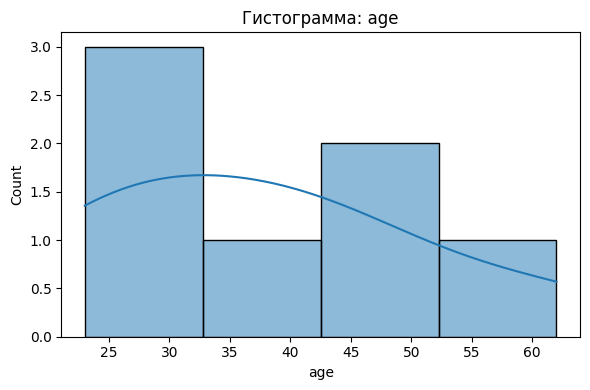

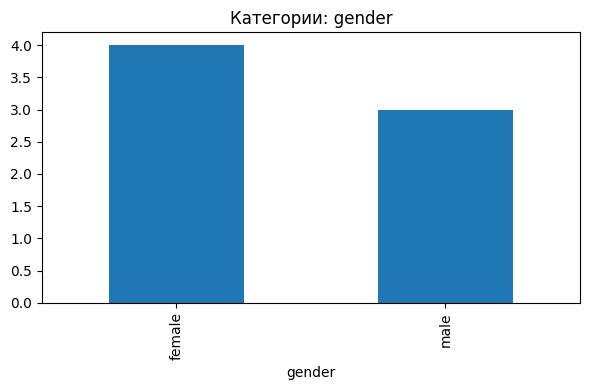

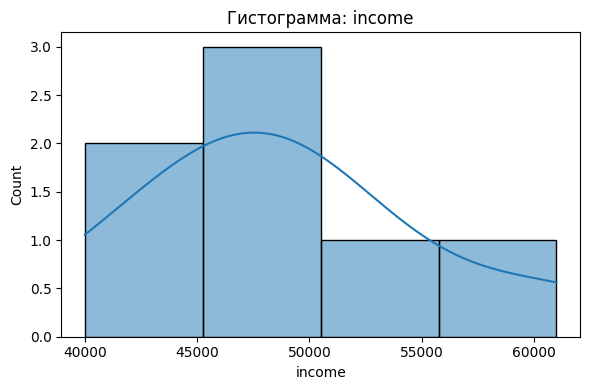

In [ ]:
# Option 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, max_categories=10):
    for column in df.columns:
        plt.figure(figsize=(6, 4))
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.histplot(df[column].dropna(), kde=True)
            plt.title(f'Гистограмма: {column}')
        elif df[column].nunique() <= max_categories:
            df[column].value_counts().plot(kind='bar')
            plt.title(f'Категории: {column}')
        else:
            print(f'Пропущен {column}: слишком много уникальных категорий')
            continue
        plt.tight_layout()
        plt.show()

plot_distributions(df1)

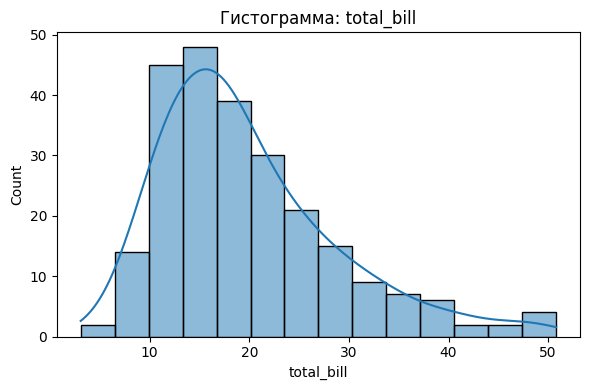

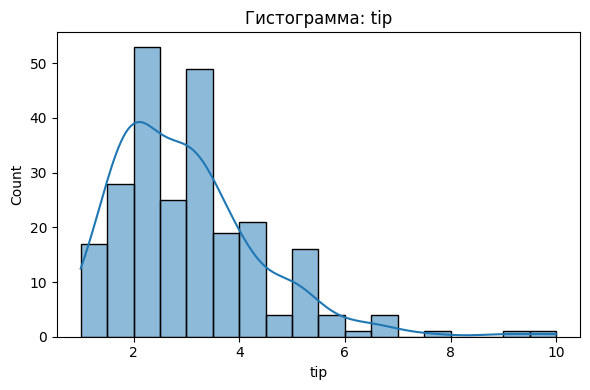

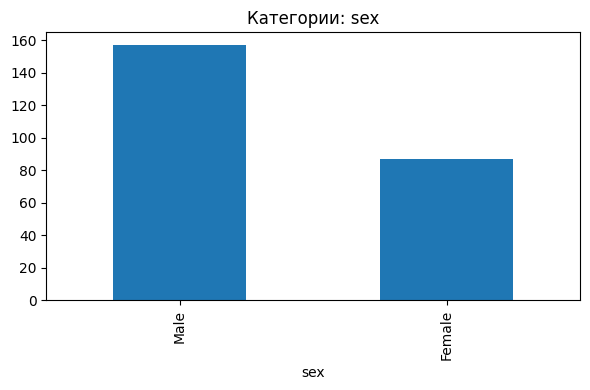

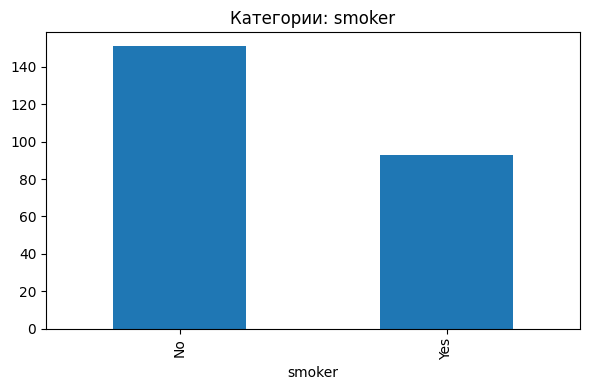

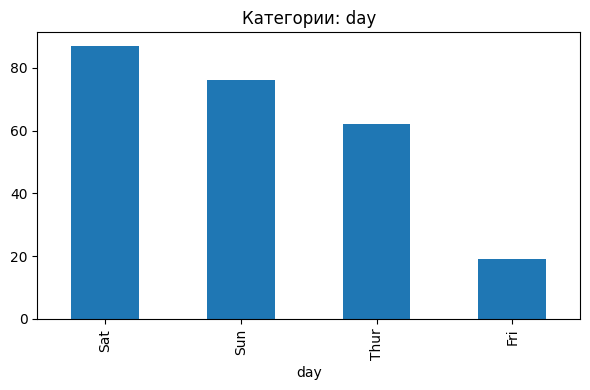

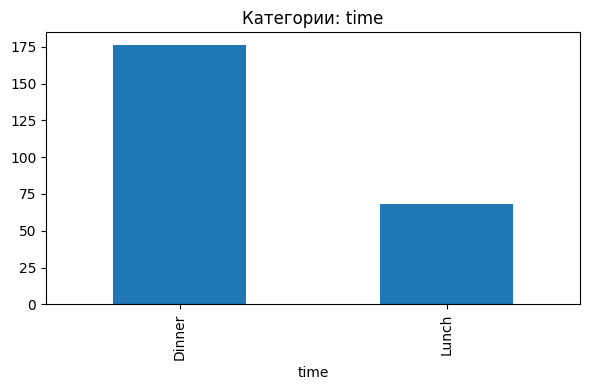

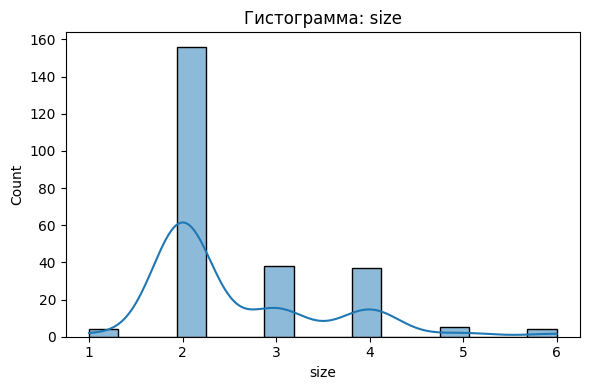

In [ ]:
plot_distributions(df2)

All columns:
- total_bill  float64
- tip         float64
- sex         category
- smoker      category
- day         category
- time        category
- size        int64


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

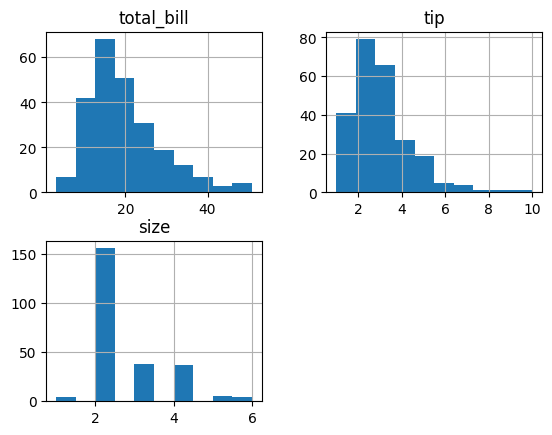

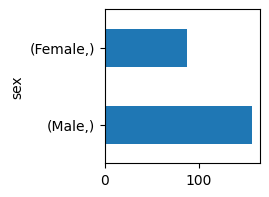

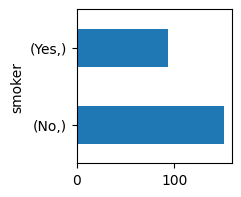

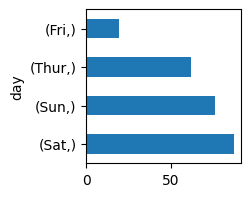

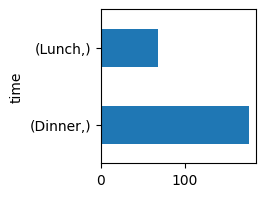

In [ ]:
def EDA_plots(df):
    # Print all columns
    print(f"All columns:")
    max_len = max(len(i) for i in list(df.columns))
    for i in list(df.columns):
        how_many_spaces = max_len - len(i)
        print(f"- {i}{' '*how_many_spaces}  {df[i].dtypes}")
    # Make histograms for numeric variables
    display(df.hist());
    # Plot categorical values
    for i in list(df.select_dtypes(include = 'category').columns.tolist()):
        plt.figure(figsize=(2,2))
        df[[i]].value_counts().plot(kind = 'barh')
        plt.show()
    return None

EDA_plots(df2)

## Quick visualisations

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='species'>

<Figure size 200x200 with 0 Axes>

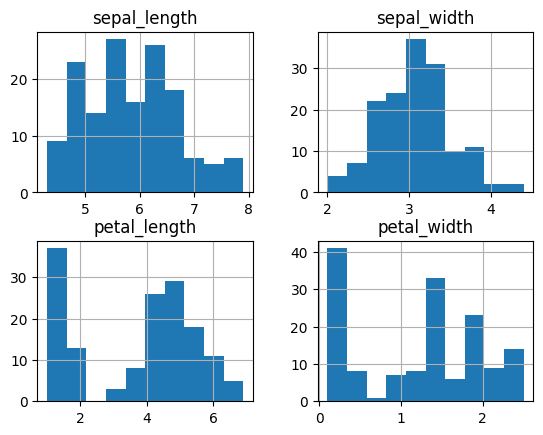

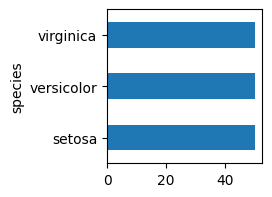

In [ ]:
"""
Quickly plot histograms for each appropriate DataFrame variable.

### v1
df.hist(
    column=['colname', 'col2'], # only plot for the specified variables
    figsize=(10,10),
    bins=20
)
### v2
df.plot(
    kind='hist', # 'barh', 'density'
    x='Sepal_length',
    figsize=(2,2)
)

### if you have categorical data
df['sepal_length'].value_counts().plot(kind='barh')
"""
plt.figure(figsize=(2,2))
df.hist()

plt.figure(figsize=(2,2))
# df['species'].value_counts(ascending = True).plot(kind='barh')
df['species'].value_counts(ascending = True).plot.barh()


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

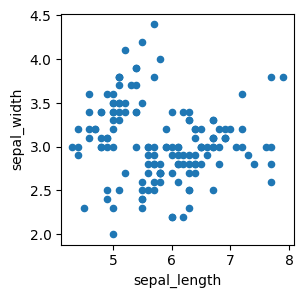

In [ ]:
"""
Scatterplot
"""
df.plot(
    kind='scatter', 
    x='sepal_length', 
    y='sepal_width', 
    figsize=(3,3)
)


In [ ]:
# Quick pie chart - count of entries
plt.figure(figsize=(3,3));
df['species'].value_counts().plot(
    kind='pie', 
    figsize=(4,4), 
    title='pie chart', 
    autopct='%1.0f%%',
    ylabel=''
)


NameError: name 'plt' is not defined

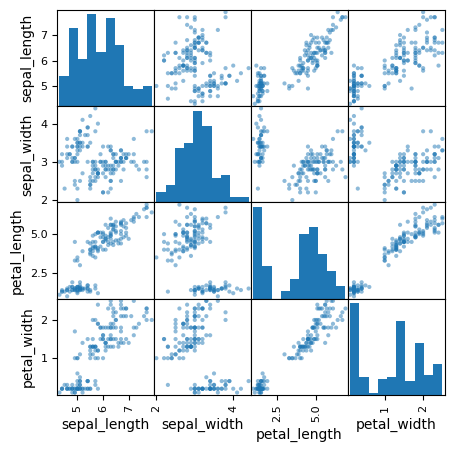

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(5,5));


Text(0.5, 0.98, '')

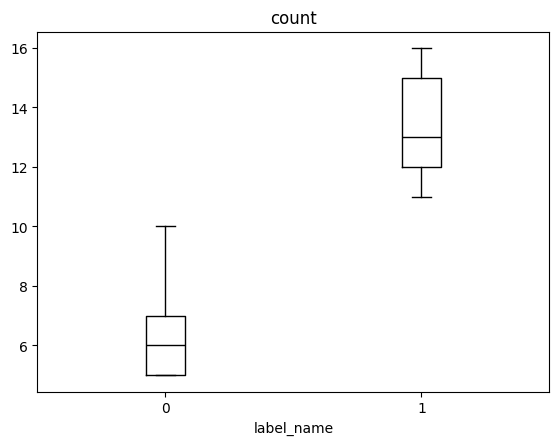

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'label_name': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    'count': [5, 6, 7, 5, 10, 15, 12, 11, 13, 16]
})
df.boxplot(
    'count',
    by = 'label_name',
    grid = False,
    showfliers = False, 
    color = 'black'
)
plt.suptitle('')

## From groupby


feat1
a    0.626154
b    0.470729
c    0.569731
Name: feat2, dtype: float64


<Axes: xlabel='feat1'>

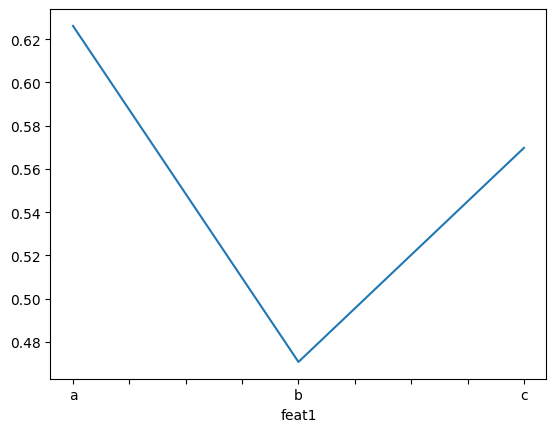

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'feat1': ['a','a','a','b','b','b','c','c','c'],
    'feat2': np.random.random(size=9)
})

print( df.groupby('feat1')['feat2'].mean() )
df.groupby('feat1')['feat2'].mean().plot()
